<a href="https://colab.research.google.com/github/Nyawira12/Supervised-and-Unsupervised-Learning-with-R/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Research Question

Kira Plastinina (Links to an external site.) is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

# 2. Objectives 

- Perform clustering stating insights drawn from your analysis and visualizations.
- Upon implementation, provide comparisons between various approaches to gain better insight of the data. 
- Present findings that can help inform the team in formulating the marketing and sales strategies of the brand. 

# 3. Success Metrics

- Grouping customers based on attributes.
- Obtain insights from variables in the dataset.
- Present results that could be used in marketing strategies. 

# 4. Understanding the Concept

The e-commerce sector is highly competitive and depends on individual company attributes like intricate segmentation for advantages. It is important to outline the groups of consumers present to tailor strategies that better appeal to them. 

# 5. Experimental Design

- Problem Definition
- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution
- Challenge the Solution
- Conclusion

# 6. Importing Libraries & Loading Data


In [ ]:
install.packages("corrplot")
install.packages("ggplot2")
install.packages("tidyverse")
install.packages("DataExplorer")
install.packages("factoextra")
install.packages("cluster")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘DataExplorer’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘

In [ ]:
library("corrplot")
library("ggplot2")
library("tidyverse")
library("factoextra")
library("cluster")

corrplot 0.84 loaded

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
Data = read.csv("online_shoppers_intention.csv")
head(Data)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [ ]:
#checking the structure of the Dataset
library(tibble)
glimpse(Data)

Rows: 12,330
Columns: 18
$ Administrative          <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, …
$ Administrative_Duration <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ Informational           <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ Informational_Duration  <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0, 0, …
$ ProductRelated          <int> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7, 6, …
$ ProductRelated_Duration <dbl> 0.000000, 64.000000, -1.000000, 2.666667, 627…
$ BounceRates             <dbl> 0.200000000, 0.000000000, 0.200000000, 0.0500…
$ ExitRates               <dbl> 0.200000000, 0.100000000, 0.200000000, 0.1400…
$ PageValues              <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ SpecialDay              <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.8, …
$ Month                   <chr> "Feb", "Feb", "Feb", "Feb", "Feb", "Feb", "Fe…
$ OperatingSystems        <int> 1, 2, 4, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, …
$ Browser                 <

The dataset has 12,330 rows and 18 columns, we check for a summary of its description

In [ ]:
summary(Data)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# 7. Data Cleaning

In [ ]:
#checking for null values
data.frame(colSums(is.na(Data)))

colSums.is.na.Data..
Administrative          14                  
Administrative_Duration 14                  
Informational           14                  
Informational_Duration  14                  
ProductRelated          14                  
ProductRelated_Duration 14                  
BounceRates             14                  
ExitRates               14                  
PageValues               0                  
SpecialDay               0                  
Month                    0                  
OperatingSystems         0                  
Browser                  0                  
Region                   0                  
TrafficType              0                  
VisitorType              0                  
Weekend                  0                  
Revenue                  0

In [ ]:
#using the mice package to fill in the missing values
install.packages("mice",dependancies = TRUE)
library("mice")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘mice’


The following objects are masked from ‘package:base’:

    cbind, rbind




In [ ]:
mice_mod <- mice(Data[, c("Administrative","Administrative_Duration","Informational","Informational_Duration","ProductRelated","ProductRelated_Duration","BounceRates","ExitRates")], method = 'rf')
mice_filled <- complete(mice_mod)

Package randomForest needed. Install from CRAN? (Yes/no/cancel) Yes

 iter imp variable
  1   1  Administrative

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   2  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   3  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   4  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   5  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  2   1  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  2   2  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  

In [ ]:
Data$Administrative <- mice_filled$Administrative
Data$Administrative_Duration <- mice_filled$Administrative_Duration
Data$Informational <- mice_filled$Informational
Data$Informational_Duration <- mice_filled$Informational_Duration
Data$ProductRelated <- mice_filled$ProductRelated
Data$ProductRelated_Duration <- mice_filled$ProductRelated_Duration
Data$BounceRates <- mice_filled$BounceRates
Data$ExitRates <- mice_filled$ExitRates

In [ ]:
#having transfered the complete values to the dataset, we check again for null values before exploring for duplicates
data.frame(colSums(is.na(Data)))

colSums.is.na.Data..
Administrative          0                   
Administrative_Duration 0                   
Informational           0                   
Informational_Duration  0                   
ProductRelated          0                   
ProductRelated_Duration 0                   
BounceRates             0                   
ExitRates               0                   
PageValues              0                   
SpecialDay              0                   
Month                   0                   
OperatingSystems        0                   
Browser                 0                   
Region                  0                   
TrafficType             0                   
VisitorType             0                   
Weekend                 0                   
Revenue                 0

In [ ]:
duplicates <- Data[duplicated(Data),] 
nrow(Data)

# remove duplicate values
Data <- unique(Data)
nrow(Data)

[1] 12330

[1] 12213

We remove the duplicates as they are a small portion of the entire dataset and anlysis would still be comprehensive despite their exclusion. 

In [ ]:
install.packages("reshape",dependencies = TRUE)
library(reshape)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘reshape’


The following object is masked from ‘package:dplyr’:

    rename


The following objects are masked from ‘package:tidyr’:

    expand, smiths




In [ ]:
#checking for outliers, we obtain the numerical columns and use them to construct boxplots to chek for anomalies
num_cols <- unlist(lapply(Data, is.numeric))   
data.frame(num_cols)


num_cols
Administrative           TRUE   
Administrative_Duration  TRUE   
Informational            TRUE   
Informational_Duration   TRUE   
ProductRelated           TRUE   
ProductRelated_Duration  TRUE   
BounceRates              TRUE   
ExitRates                TRUE   
PageValues               TRUE   
SpecialDay               TRUE   
Month                   FALSE   
OperatingSystems         TRUE   
Browser                  TRUE   
Region                   TRUE   
TrafficType              TRUE   
VisitorType             FALSE   
Weekend                 FALSE   
Revenue                 FALSE

In [ ]:
Numericals <- Data[ , num_cols]

In [ ]:
#Melting the data to view the outliers
meltData <- melt(Numericals)

Using  as id variables



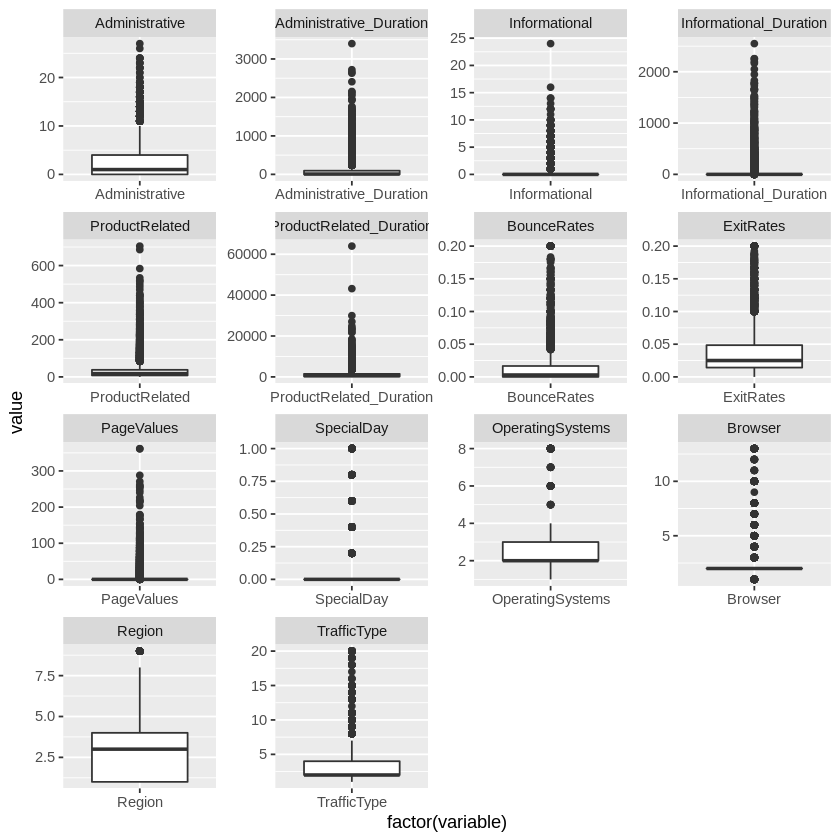

In [ ]:
#Plotting the boxplots for the numerical columns.
p <- ggplot(meltData, aes(factor(variable), value)) 
p + geom_boxplot() + facet_wrap(~variable, scale="free")

There are outliers in each of the numerical variables and they contain individual customer information. Removing them from the dataset may lose necessary information and will hence include the outliers in analysis. 

In [ ]:
# encode categorical columns
install.packages('caret')
library(package = "lattice")
library(caret)

Data1 <- dummyVars(" ~ .", data = Data, fullRank = T)
Dataset <- data.frame(predict(Data1, newdata = Data))

glimpse(Dataset)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’



Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




Rows: 12,213
Columns: 27
$ Administrative               <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ Administrative_Duration      <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ Informational                <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ Informational_Duration       <dbl> 0, 0, -1, 0, 0, 0, -1, -1, 0, 0, 0, 0, 0…
$ ProductRelated               <dbl> 1, 2, 1, 2, 10, 19, 1, 1, 2, 3, 3, 16, 7…
$ ProductRelated_Duration      <dbl> 0.000000, 64.000000, -1.000000, 2.666667…
$ BounceRates                  <dbl> 0.200000000, 0.000000000, 0.200000000, 0…
$ ExitRates                    <dbl> 0.200000000, 0.100000000, 0.200000000, 0…
$ PageValues                   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ SpecialDay                   <dbl> 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, …
$ MonthDec                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ MonthFeb                     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ MonthJul                 

# 8. Exploratory Data Analysis

## a) Univariate Analysis

In [ ]:
library(data.table)

Dataset <- data.table(Dataset)


Attaching package: ‘data.table’


The following object is masked from ‘package:reshape’:

    melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:
numerical_cols = Dataset[,1:10]

In [ ]:
# check quantiles for numeric columns
quantiles <- numerical_cols[,lapply(.SD, quantile)]
quantile_range = list('min',25,50,75,'max')
rownames(quantiles) <- quantile_range
quantiles

Administrative Administrative_Duration Informational Informational_Duration
1  0               -1.00                  0              -1.000              
2  0                0.00                  0               0.000              
3  1                9.00                  0               0.000              
4  4               94.60                  0               0.000              
5 27             3398.75                 24            2549.375              
  ProductRelated ProductRelated_Duration BounceRates ExitRates  PageValues
1   0               -1.0000              0.000000000 0.00000000   0.0000  
2   8              193.3333              0.000000000 0.01423097   0.0000  
3  18              608.9429              0.002898551 0.02500000   0.0000  
4  38             1476.3000              0.016666667 0.04852941   0.0000  
5 705            63973.5222              0.200000000 0.20000000 361.7637  
  SpecialDay
1 0         
2 0         
3 0         
4 0         
5 1

In [ ]:
# install flibrary for measures of dispersion and central tendencies
install.packages("fBasics", dependencies=TRUE)
library('fBasics')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeSeries’, ‘gss’, ‘stabledist’, ‘akima’, ‘RUnit’


Loading required package: timeDate

Loading required package: timeSeries



In [ ]:
library("timeDate")
library("timeSeries")

In [ ]:
# check for mean values
data.frame(colMeans(numerical_cols))

colMeans.numerical_cols.
Administrative          2.338492e+00            
Administrative_Duration 8.163074e+01            
Informational           5.084746e-01            
Informational_Duration  3.479994e+01            
ProductRelated          3.203988e+01            
ProductRelated_Duration 1.206704e+03            
BounceRates             2.044946e-02            
ExitRates               4.151116e-02            
PageValues              5.945677e+00            
SpecialDay              6.190125e-02

In [ ]:
# checking the standard deviation
data.frame(colStdevs(numerical_cols))

colStdevs.numerical_cols.
Administrative          3.329742e+00             
Administrative_Duration 1.774564e+02             
Informational           1.275393e+00             
Informational_Duration  1.413820e+02             
ProductRelated          4.458069e+01             
ProductRelated_Duration 1.919031e+03             
BounceRates             4.541423e-02             
ExitRates               4.625880e-02             
PageValues              1.864818e+01             
SpecialDay              1.996071e-01

In [ ]:
# checking the variance
data.frame(colVars(numerical_cols))

colVars.numerical_cols.
Administrative          1.108718e+01           
Administrative_Duration 3.149078e+04           
Informational           1.626627e+00           
Informational_Duration  1.998886e+04           
ProductRelated          1.987438e+03           
ProductRelated_Duration 3.682680e+06           
BounceRates             2.062453e-03           
ExitRates               2.139877e-03           
PageValues              3.477547e+02           
SpecialDay              3.984299e-02

In [ ]:
# checking the skewness
data.frame(skewness(numerical_cols))

skewness.numerical_cols.
Administrative          1.946953                
Administrative_Duration 5.590894                
Informational           4.013696                
Informational_Duration  7.540879                
ProductRelated          4.333650                
ProductRelated_Duration 7.253502                
BounceRates             3.151538                
ExitRates               2.231666                
PageValues              6.351474                
SpecialDay              3.286450

In [ ]:
# checking the kurtosis
data.frame(kurtosis(numerical_cols))

kurtosis.numerical_cols.
Administrative            4.640161              
Administrative_Duration  50.116941              
Informational            26.648584              
Informational_Duration   75.539104              
ProductRelated           31.073454              
ProductRelated_Duration 136.680815              
BounceRates               9.246132              
ExitRates                 4.616624              
PageValues               65.000579              
SpecialDay                9.800495

In [ ]:
# install the grid extra package
library(grid)
install.packages("gridExtra")
require(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




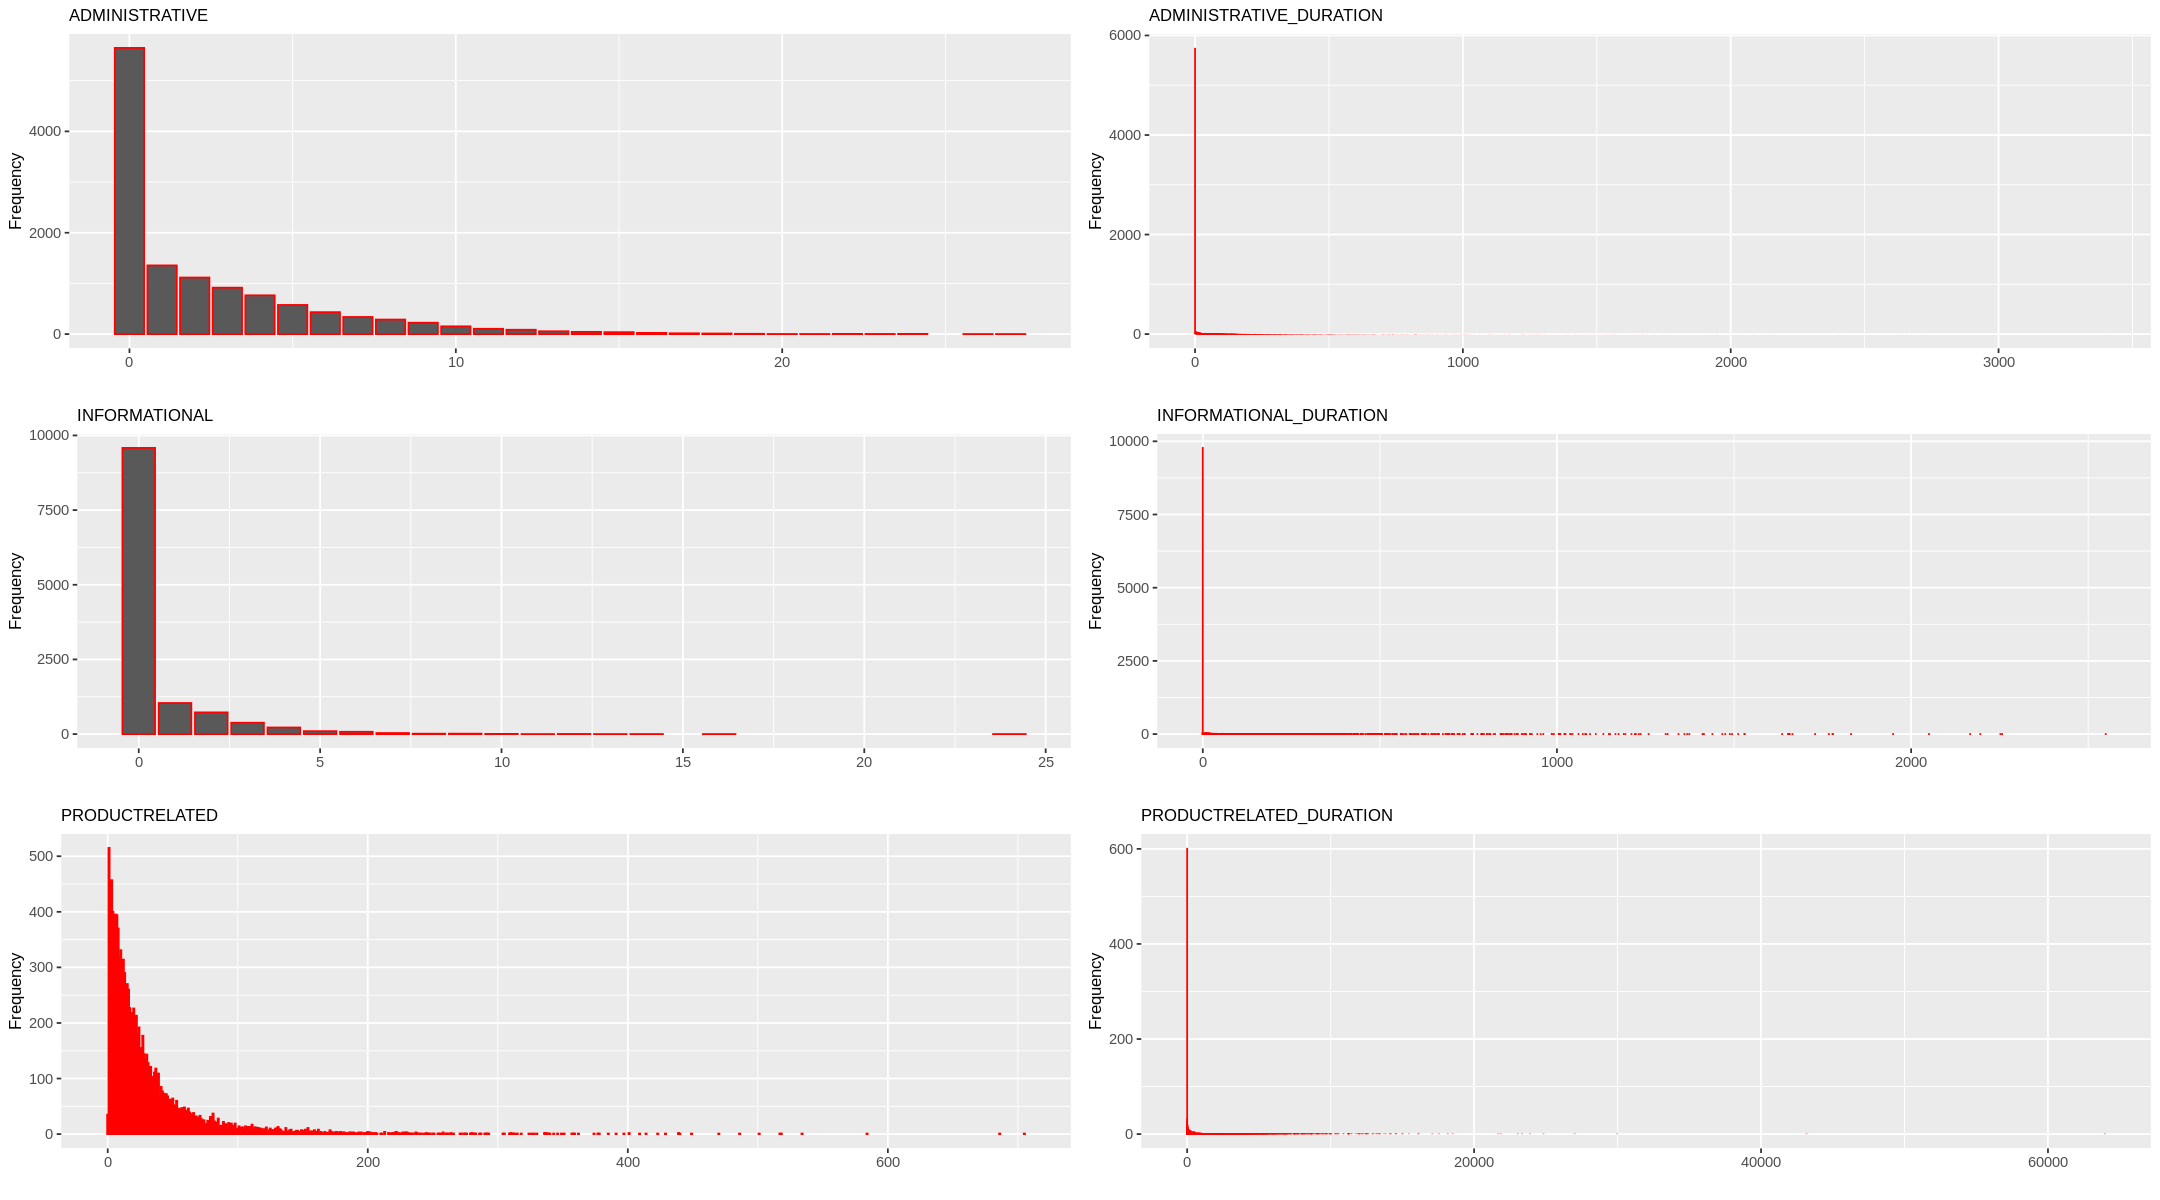

In [ ]:
# Plotting histograms
fac_cols = c('Administrative', 'Administrative_Duration',	'Informational',	'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration')

columns = colnames(select(Data, all_of(fac_cols)))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:6){
  p[[i]] = ggplot(Dataset, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

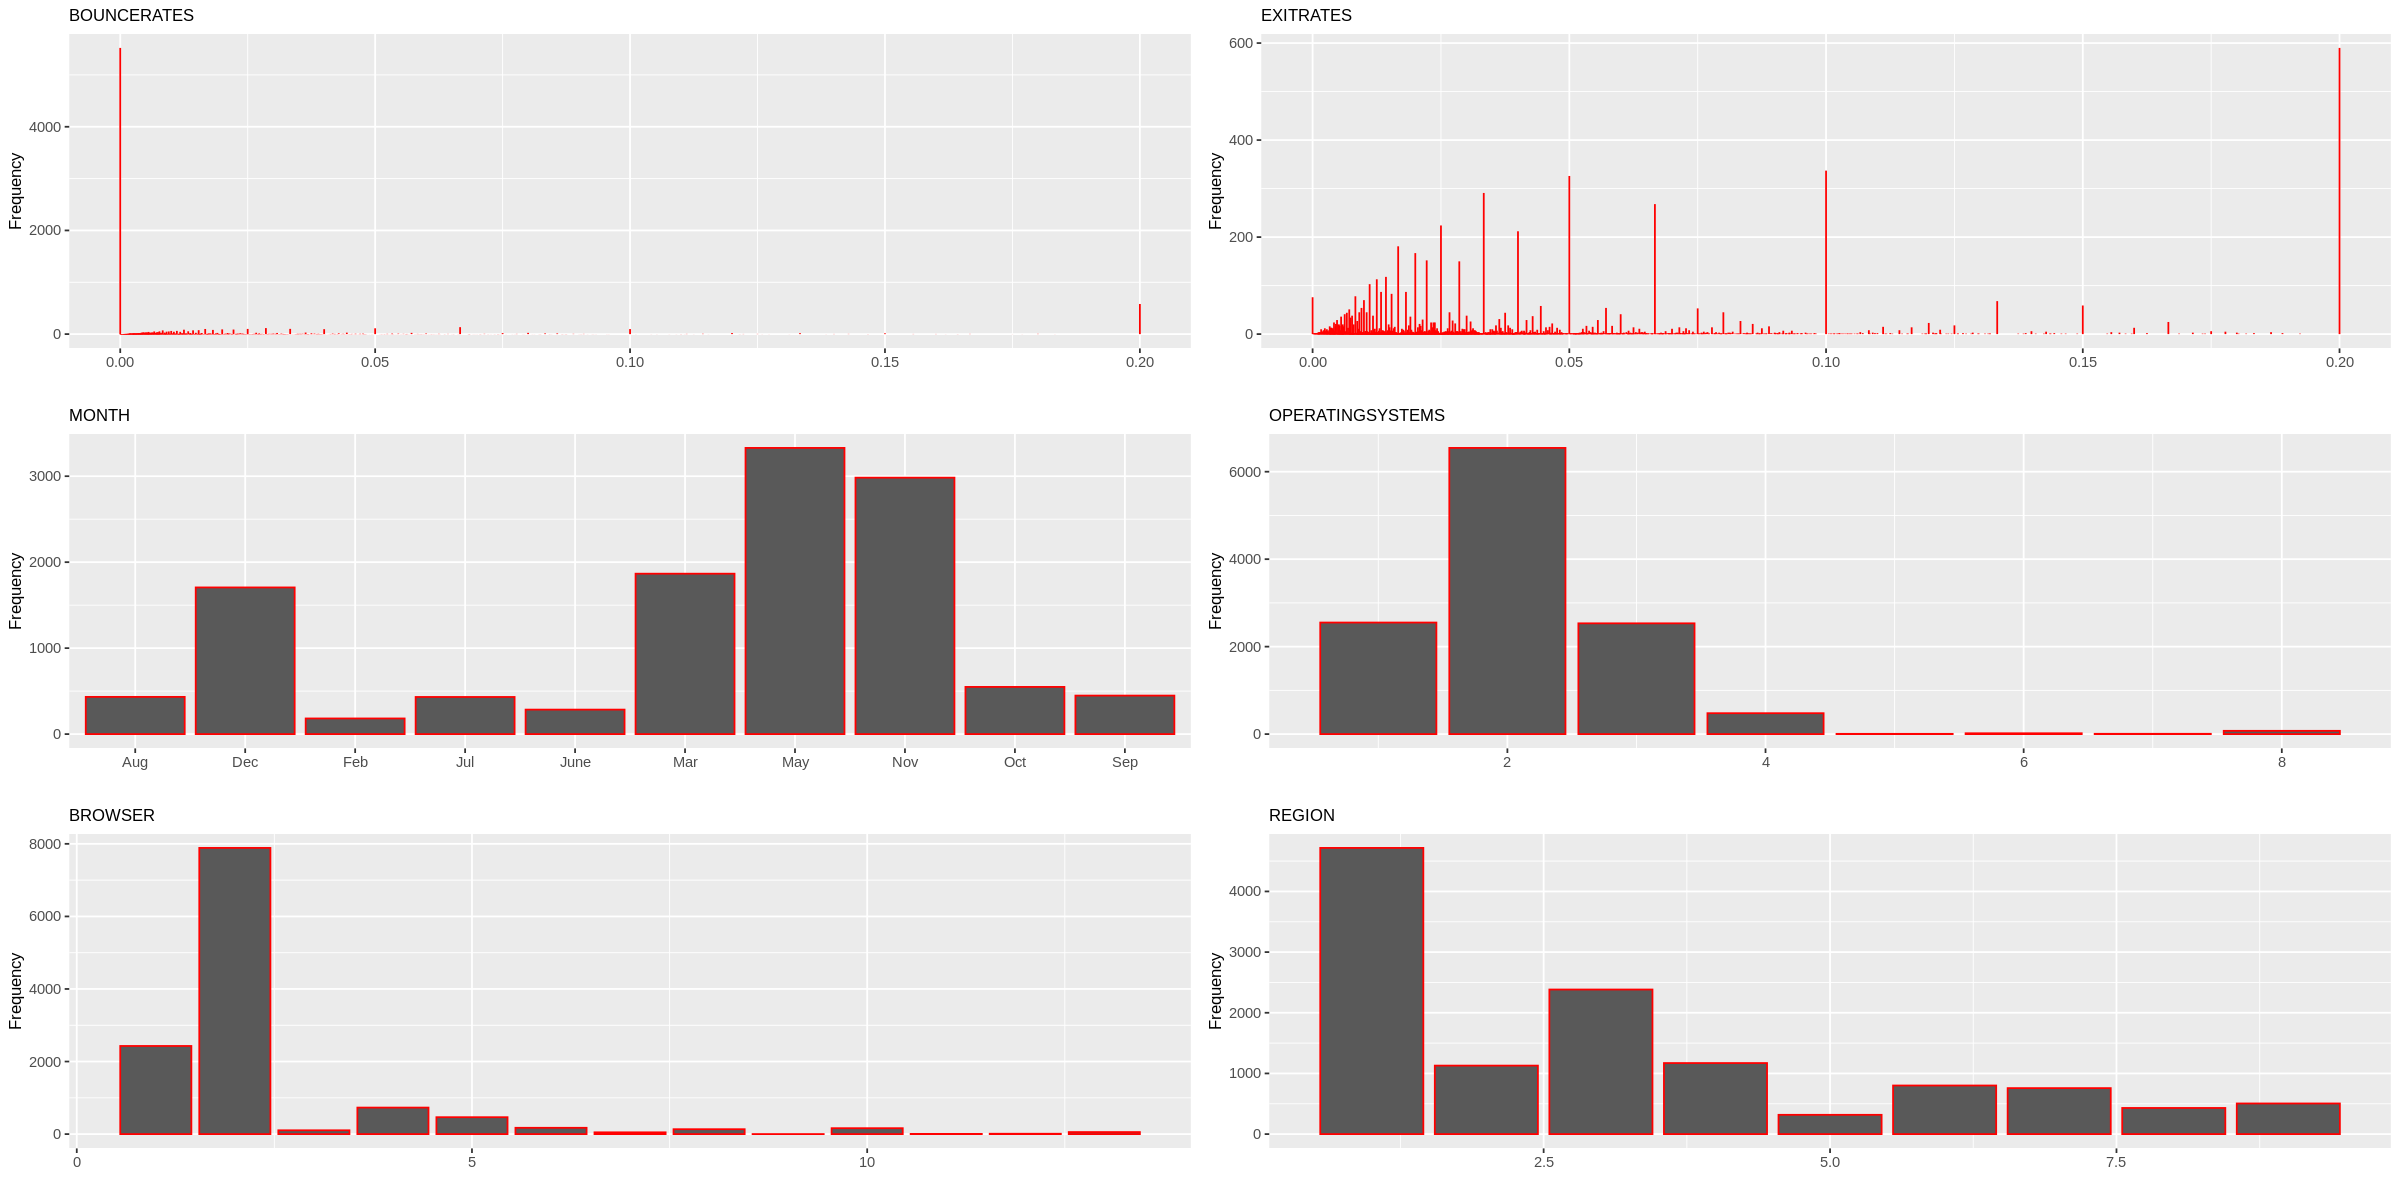

In [ ]:
# Plotting histograms
fac_cols = c('BounceRates', 'ExitRates', 'Month', 'OperatingSystems', 'Browser', 'Region')

columns = colnames(select(Data, fac_cols))

p = list()
options(repr.plot.width = 20, repr.plot.height = 10)
for (i in 1:6){
  p[[i]] = ggplot(Data, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

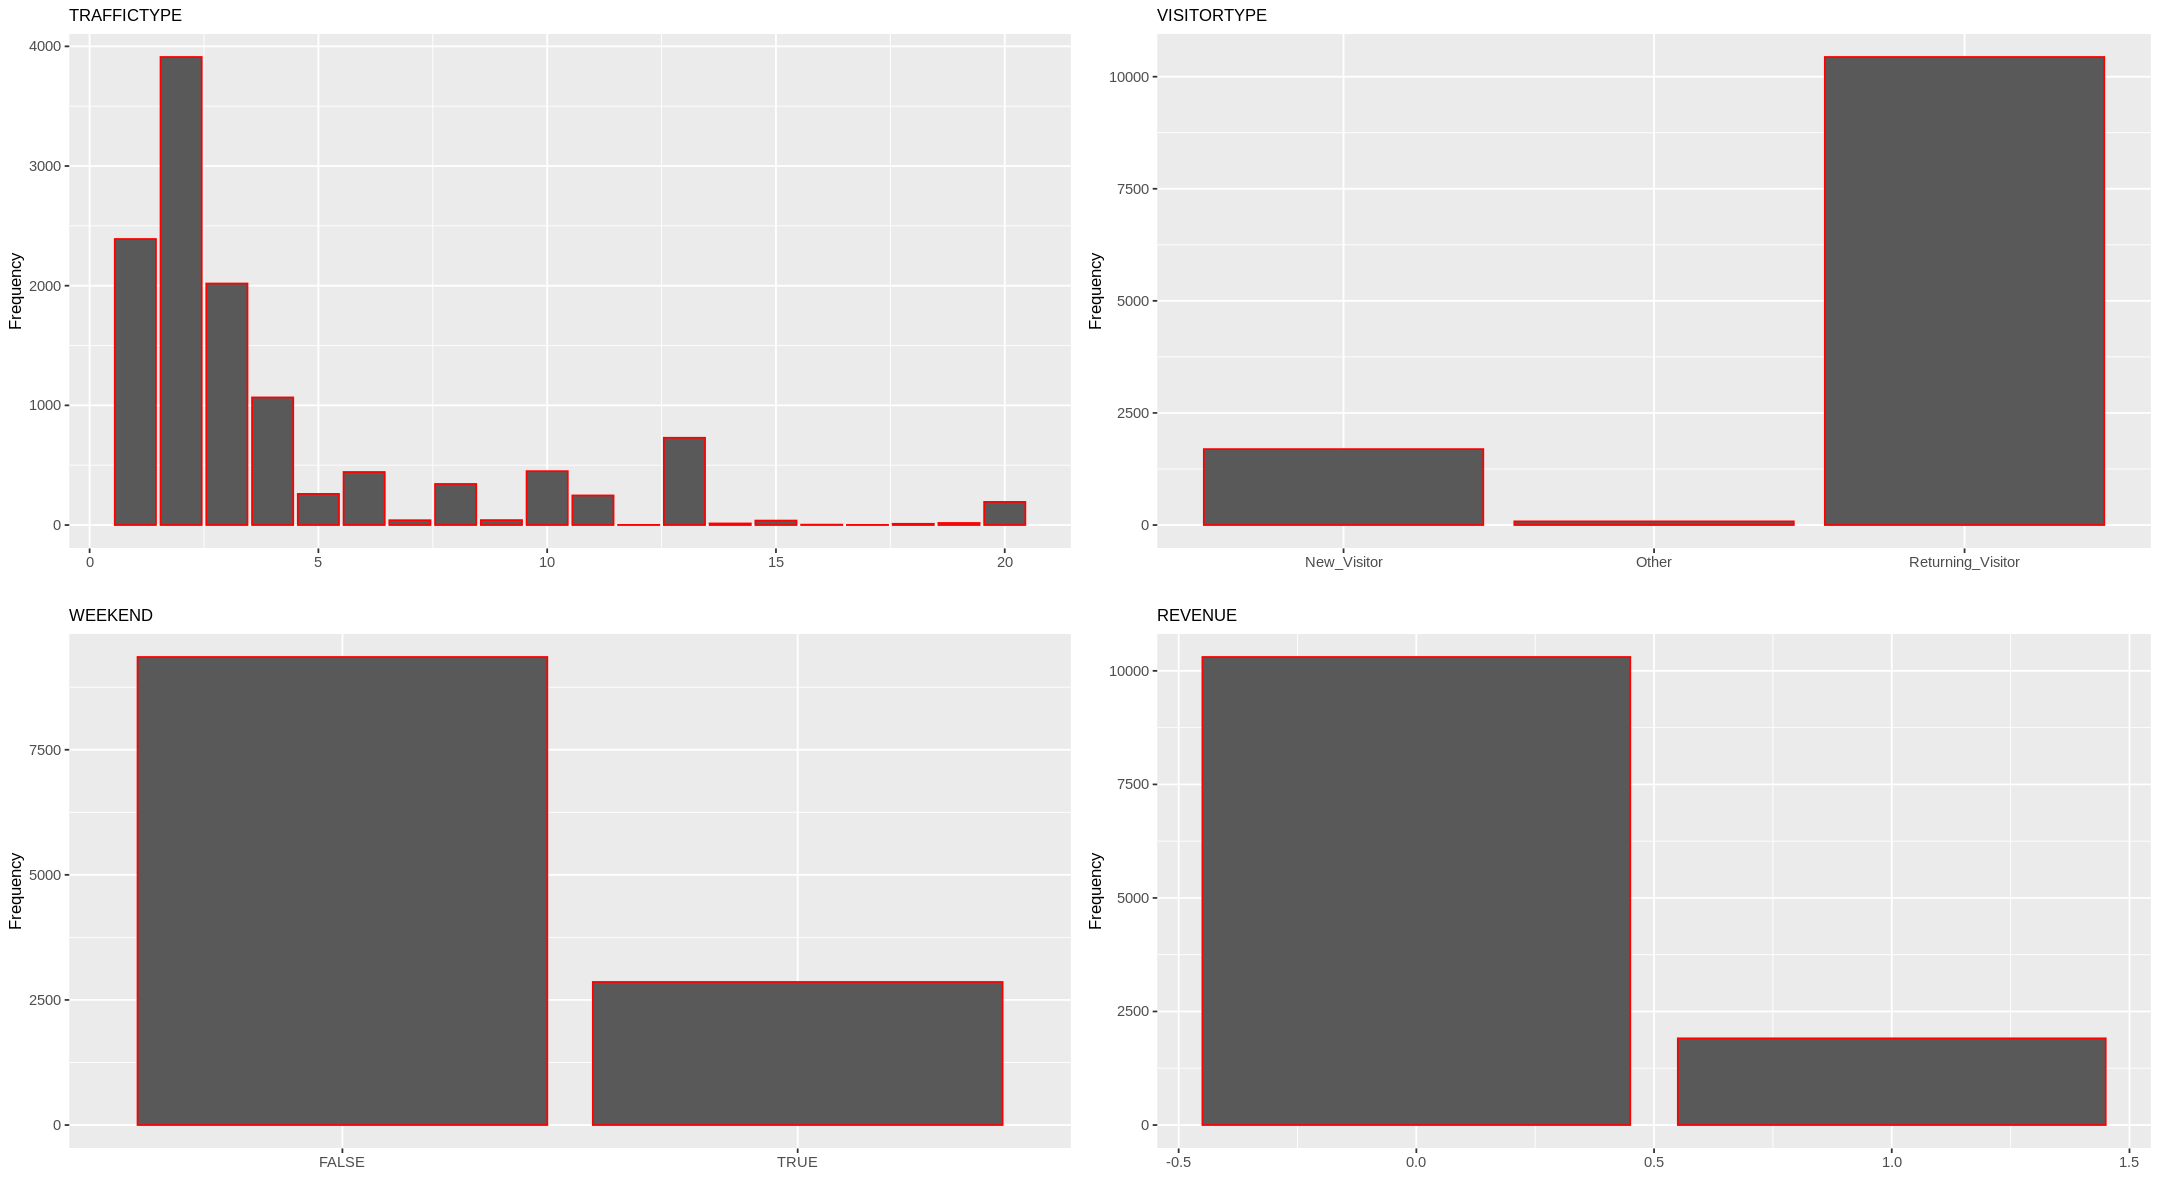

In [ ]:
# Plotting histograms
fac_cols = c('TrafficType', 'VisitorType', 'Weekend', 'Revenue')

columns = colnames(select(Data, fac_cols))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:4){
  p[[i]] = ggplot(Data, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

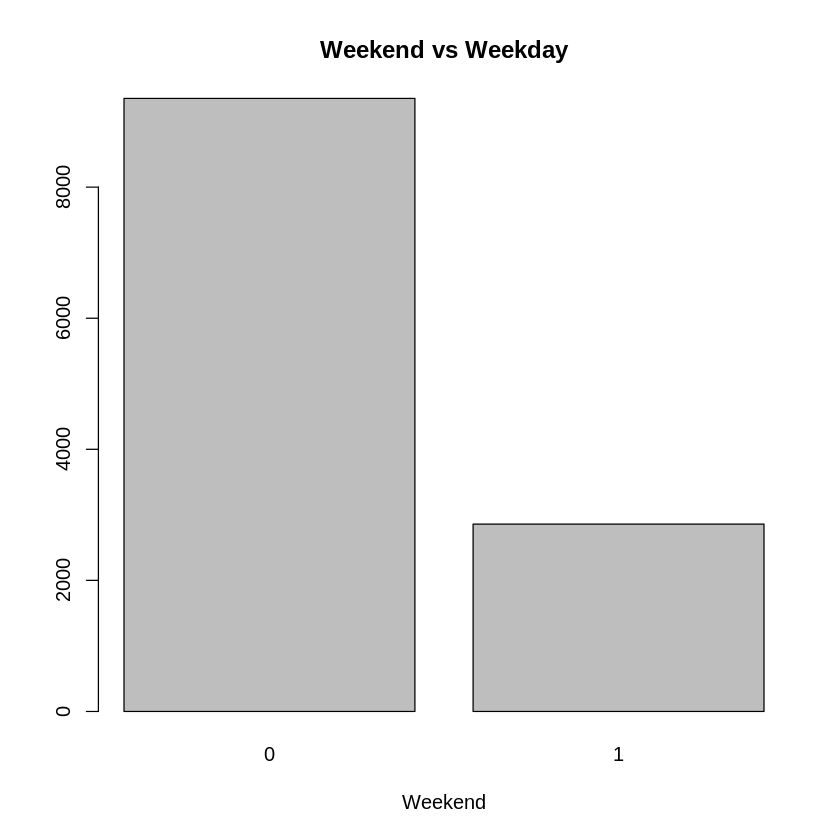

In [ ]:
barplot(table(Dataset$WeekendTRUE), main='Weekend vs Weekday', xlab='Weekend')
#most days observed were weekdays

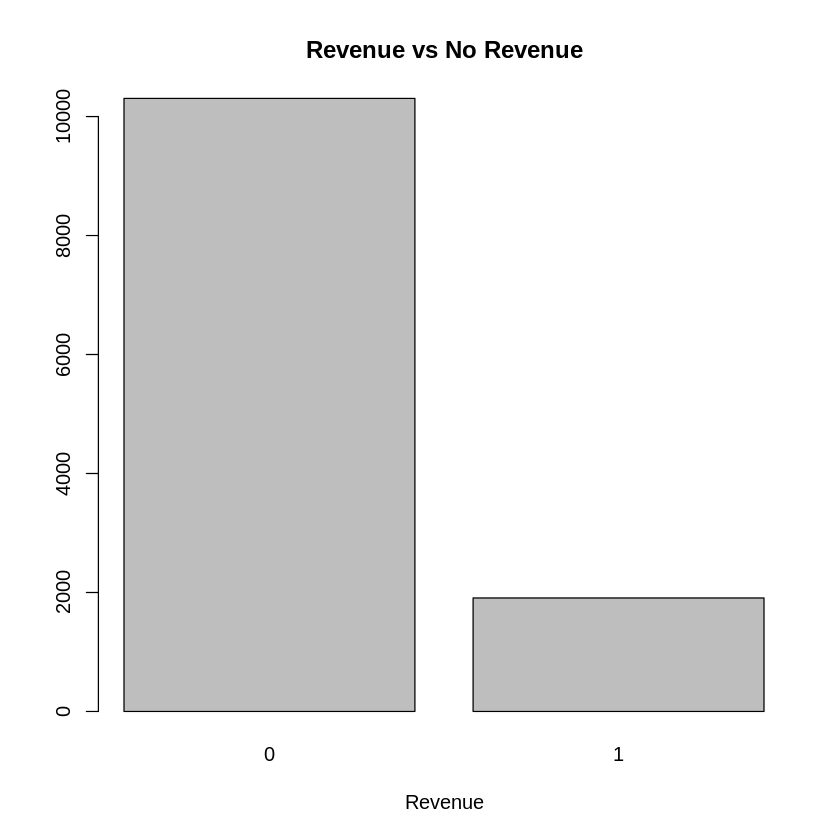

In [ ]:
# check Revenue count 
barplot(table(Dataset$RevenueTRUE), main='Revenue vs No Revenue', xlab='Revenue')
#most datapoints did not have a revenue return

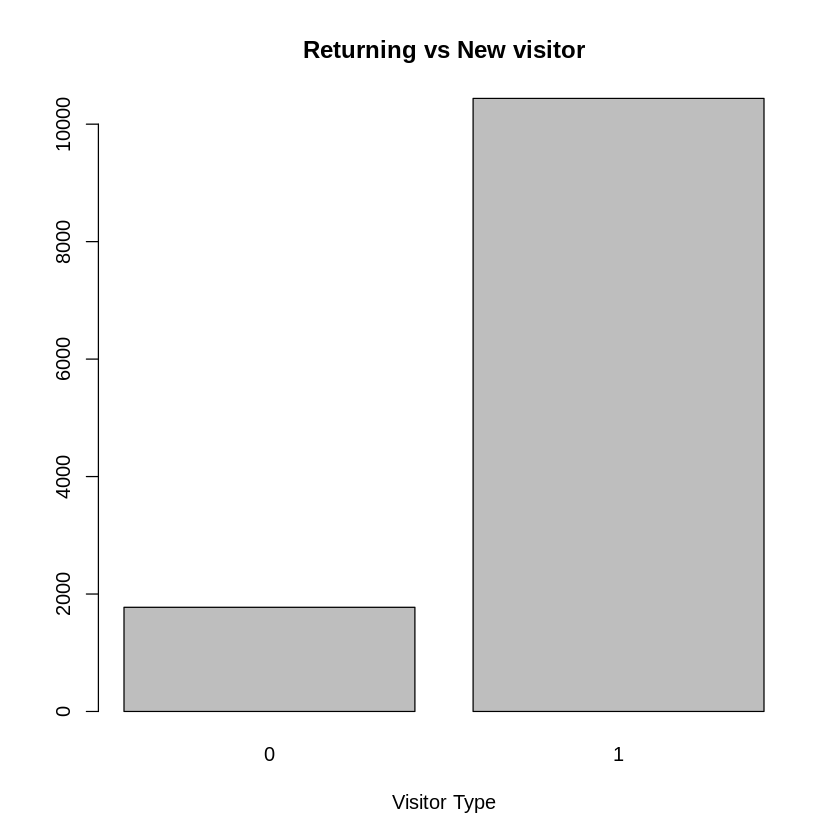

In [ ]:
#check Visitor type count 
barplot(table(Dataset$VisitorTypeReturning_Visitor), main='Returning vs New visitor', xlab='Visitor Type')
#new visitors are more than returning visitors

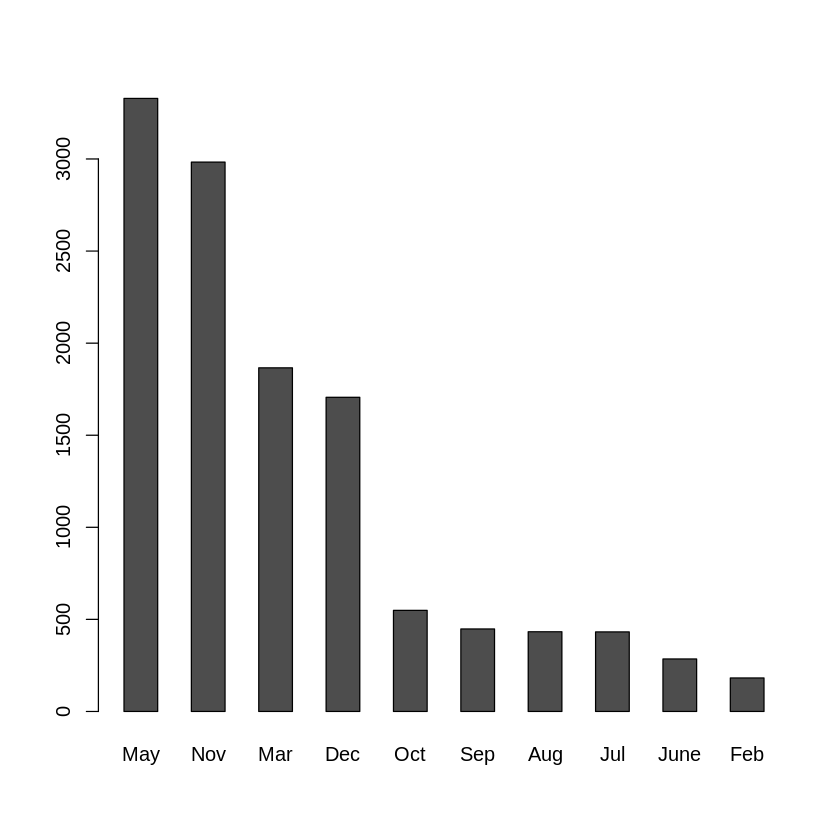

In [ ]:
# get frequencies of month column
month_frequency <- sort(table(Data$Month), decreasing=T)  
month_frequency <- data.frame(month_frequency)

rownames(month_frequency) <- month_frequency$Var1
month_frequency$Var1 <- NULL

barplot(t(as.matrix(month_frequency)), beside=TRUE)

#all months were included, with May providing the most information and February the least. 

## b) Bivariate Analysis

In [ ]:
#Grouping the month with the total number of persons who had revenue
Data$Revenue = as.character(Data$Revenue)
Data$Revenue <- recode(Data$Revenue , 'TRUE' = 1, 'FALSE' = 0 )
month <- Data %>% 
  group_by(Month) %>%
  summarise(n=sum(Revenue, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



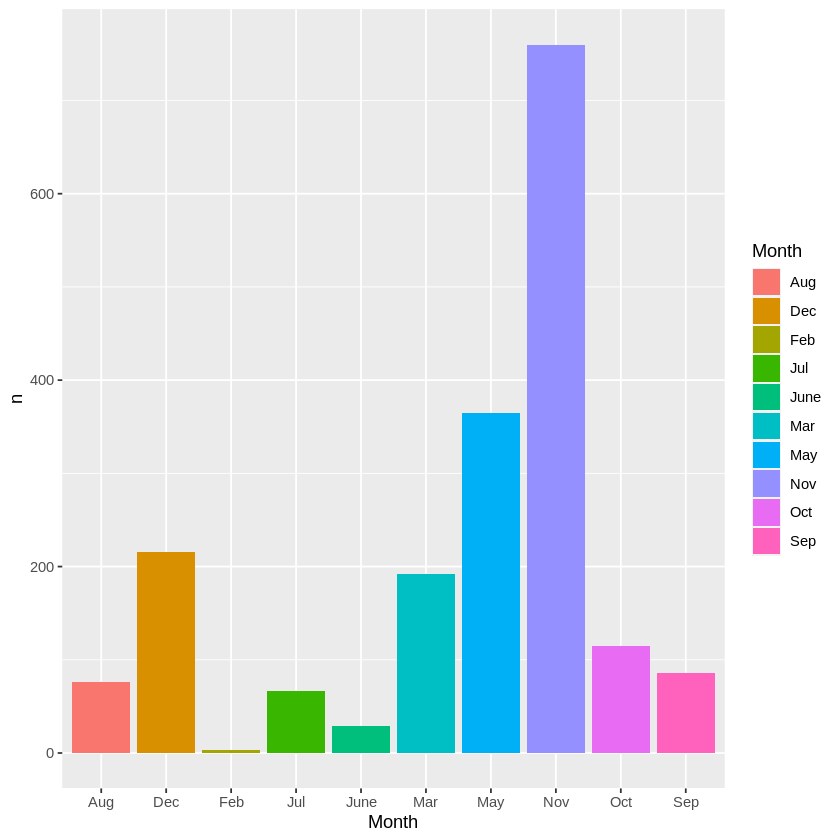

In [ ]:
#Plotting the results to find out the month with the highest number of persons with revenues.
z <- ggplot(month, aes(x = `Month`, y = n))

z + geom_col(aes(fill = `Month`))

The following months posted the most revenue:
1. November
2. May
3. December
4. March

The high volumes of revenue at the end of the year could be attributed to sales and offers. 

In [ ]:
#Grouping the visitor type by the revenues
visitor <- Data %>% 
  group_by(VisitorType) %>%
  summarise(n=sum(Revenue, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(10)

`summarise()` ungrouping output (override with `.groups` argument)



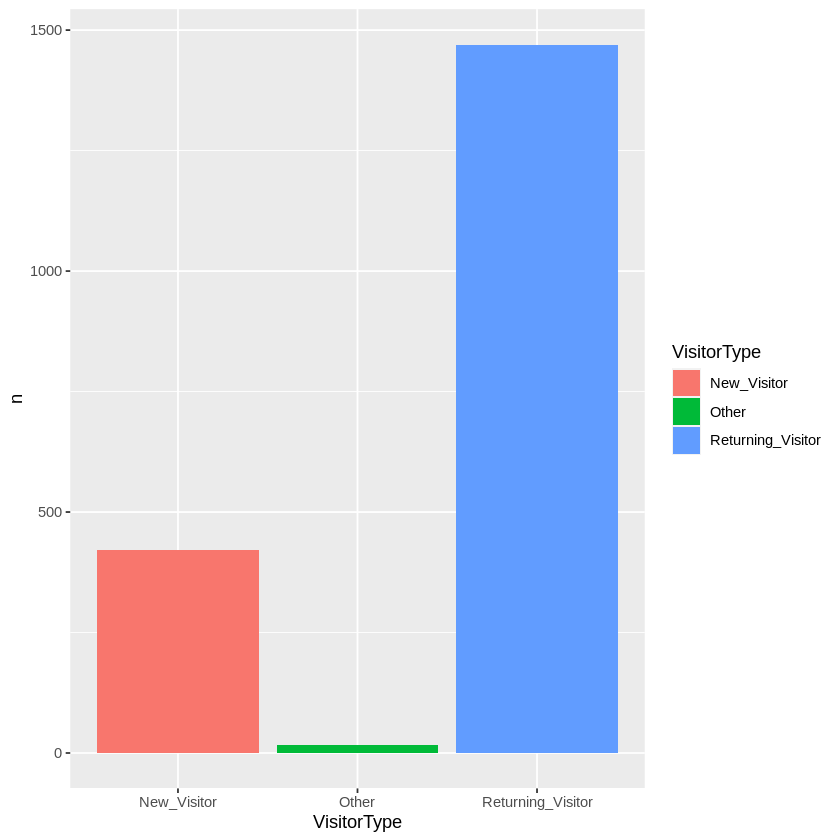

In [ ]:
#Viewing the results of the visitor type 
a <- ggplot(visitor, aes(x = `VisitorType`, y = n))

a + geom_col(aes(fill = `VisitorType`))

A returning visitor is more likely to make a purchase than othr types

In [ ]:
#Grouping the special days by the number of persons who generated revenue
special_day <- Data %>% 
  group_by(SpecialDay) %>%
  summarise(n=sum(Revenue, na.rm=TRUE)) %>%
  arrange(desc(n))%>%
  head(6)

`summarise()` ungrouping output (override with `.groups` argument)



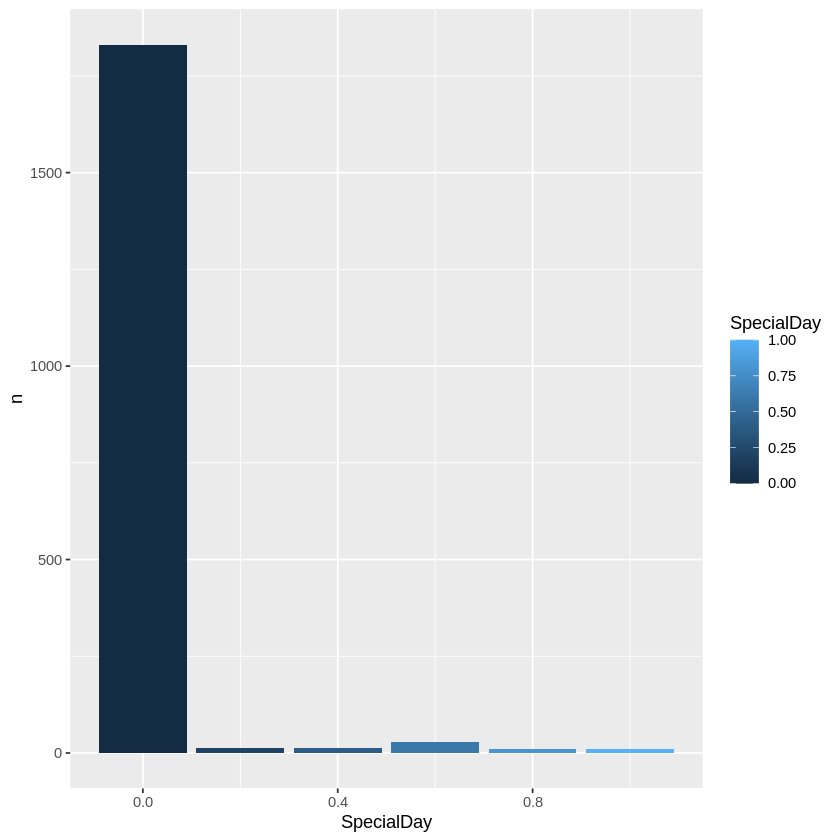

In [ ]:
#Viewing the results.
c <- ggplot(special_day, aes(x = `SpecialDay`, y = n))

c + geom_col(aes(fill = `SpecialDay`))

There seem to be no relation between the special days and revenue generated

In [ ]:
#Grouping the weekends by the number of persons who brought in Revenue
weekend <- Data %>% 
  group_by(Weekend) %>%
  summarise(n=sum(Revenue, na.rm=TRUE)) 

`summarise()` ungrouping output (override with `.groups` argument)



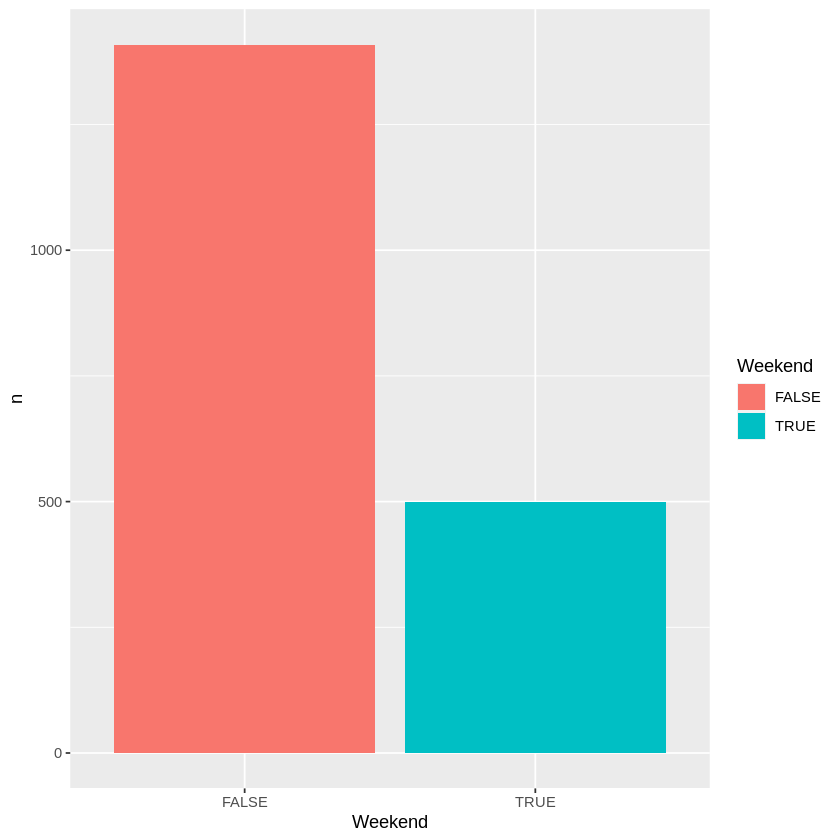

In [ ]:
#Viewing the results.
c <- ggplot(weekend, aes(x = `Weekend`, y = n))

c + geom_col(aes(fill = `Weekend`))

Most of the revenue was generated in weekdays, which coincides with more information coming from the same horizon

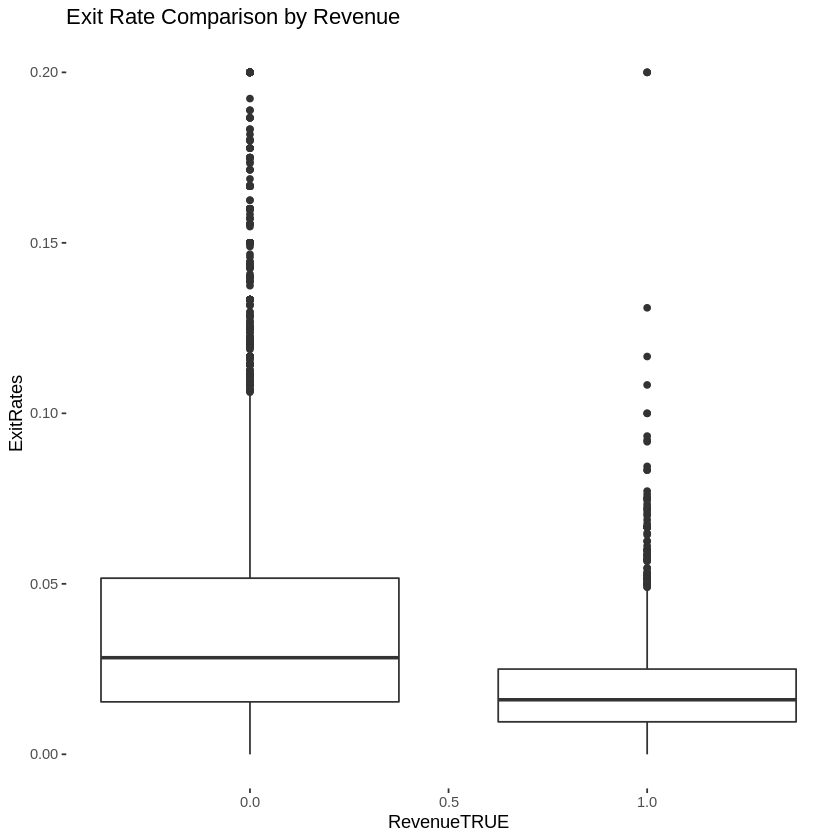

In [ ]:
# compare mean and dispersion of 
ggplot(data = Dataset,
  aes(x = RevenueTRUE, y = ExitRates, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Exit Rate Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

The customers that were converted had lower exit rates than those that were not

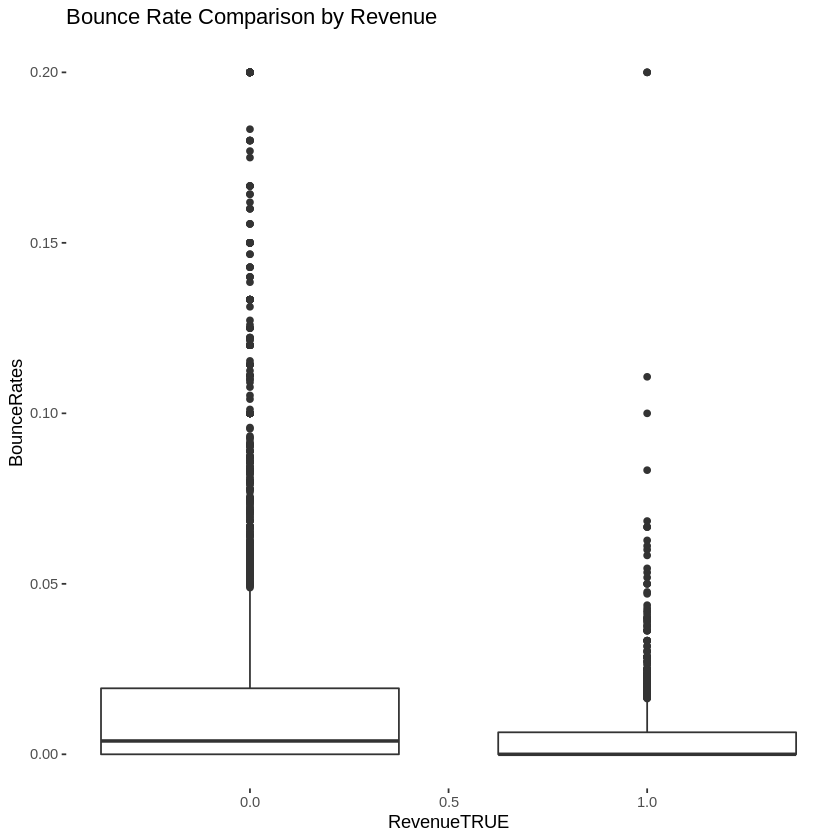

In [ ]:
# compare mean and dispersion of 
ggplot(data = Dataset,
  aes(x = RevenueTRUE, y = BounceRates, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Bounce Rate Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

The bounce rates were lower for customers that were converted, they generated more revenue

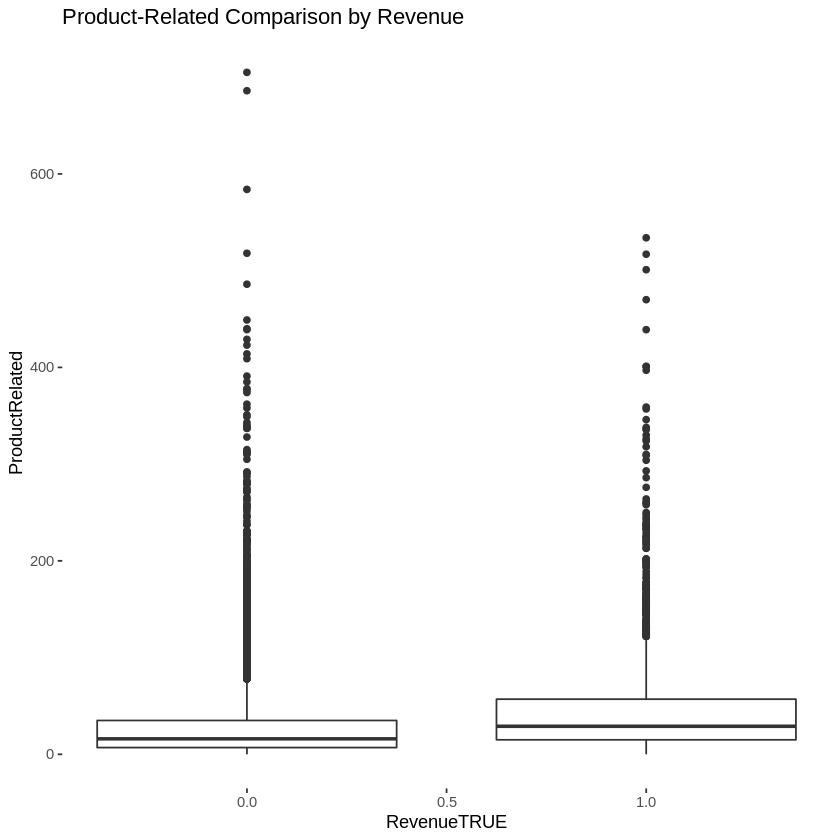

In [ ]:
# compare mean and dispersion of 
ggplot(data = Dataset,
  aes(x = RevenueTRUE, y = ProductRelated, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Product-Related Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

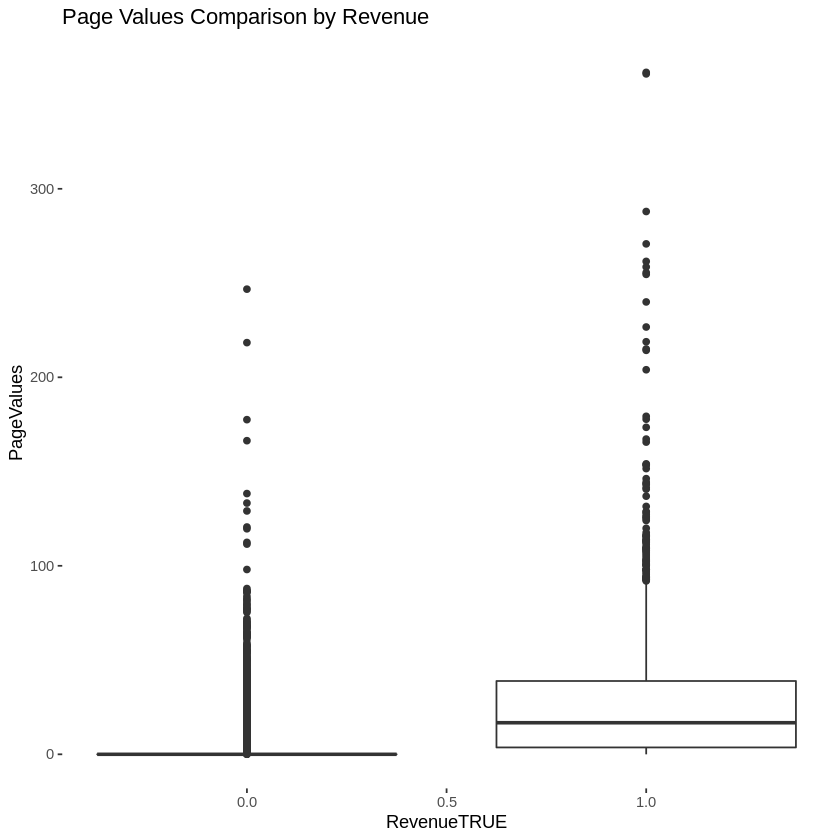

In [ ]:
# compare mean and dispersion of 
ggplot(data = Dataset,
  aes(x = RevenueTRUE, y = PageValues, group = RevenueTRUE)) +
  geom_boxplot() +
  labs(title = "Page Values Comparison by Revenue") +
  theme(panel.background = element_rect(fill = "white"))

Individuals that opened more pages generated more revenue than those that had fewer pages

A higher page value also indicates higher probability of being converted.

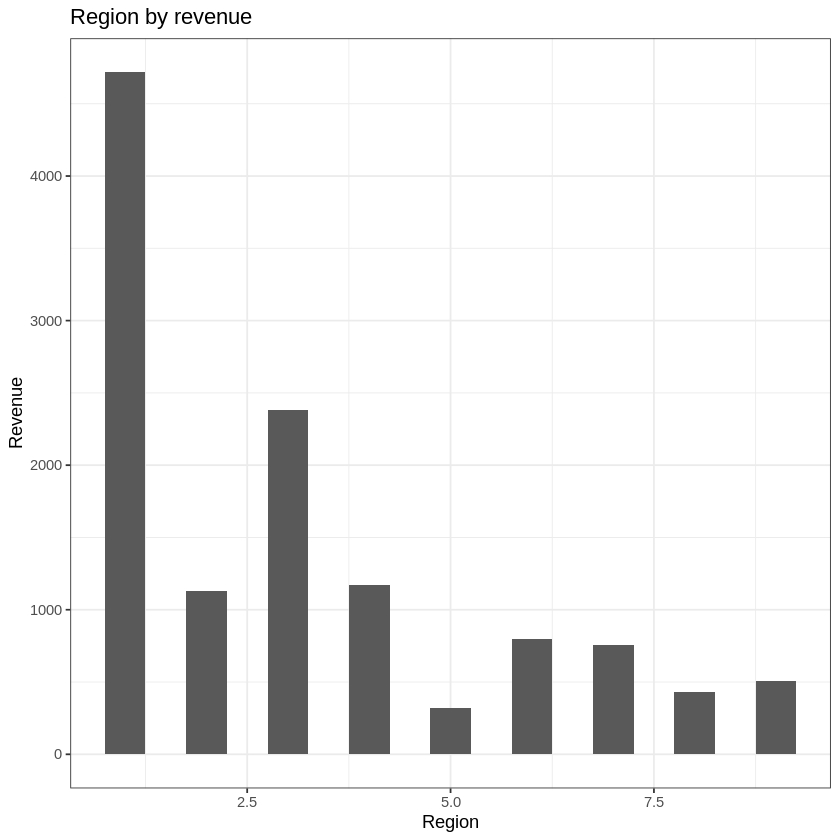

In [ ]:
ggplot(Data,aes(x = Region, fill = Revenue )) +
  theme_bw() + # make the background white in color instead of default grey
  geom_bar(width=0.5) + 
  labs(y = "Revenue", title = "Region by revenue ") # label the x and y axis

Region one and three generate the most revenue

In [ ]:
head(Data)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   0      
2 Returning_Visitor FALSE   0      
3 Returning_Visitor FALSE   0      
4 Returning_Visitor FALSE   0      
5 Returning_Visitor  TRUE   0      
6 Returning_Visitor FALSE   0

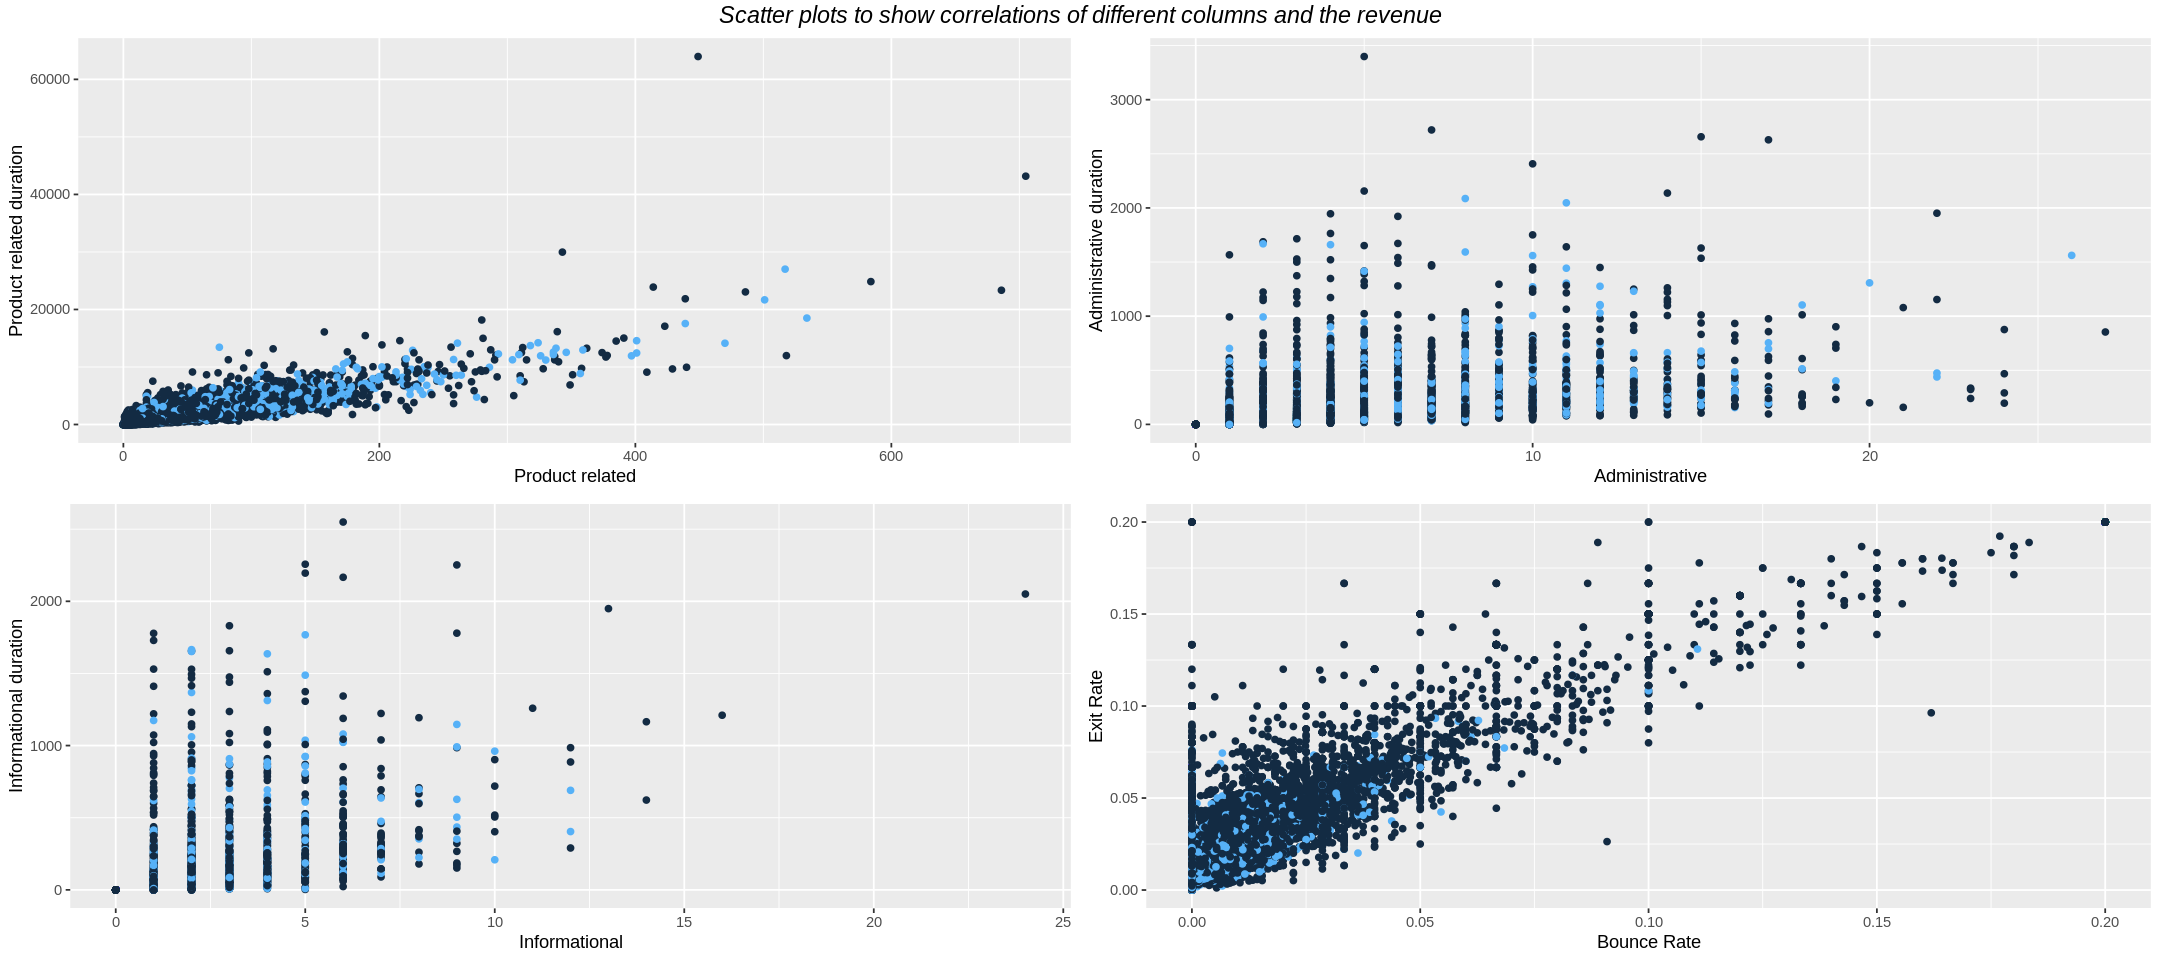

In [ ]:
# scatter plots 
options(repr.plot.width = 18, repr.plot.height = 8)

s1 = ggplot(Data, aes(ProductRelated,	ProductRelated_Duration, col = Revenue)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x='Product related', y ='Product related duration')

s2 = ggplot(Data, aes(Administrative,	Administrative_Duration, col = Revenue)) +
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Administrative', y = 'Administrative duration')

s3 = ggplot(Data, aes(Informational,	Informational_Duration, col = Revenue)) + 
    geom_point() + theme(legend.position = 'none') + 
    labs(x = 'Informational', y = 'Informational duration')

s4 = ggplot(Data, aes(BounceRates, ExitRates, col = Revenue)) + 
    geom_point() + theme(legend.position = 'none') +
    labs(x = 'Bounce Rate', y = 'Exit Rate')

grid.arrange(s1, s2, s3, s4, ncol = 2,
             top = textGrob("Scatter plots to show correlations of different columns and the revenue",gp=gpar(fontsize=14,font=3)))

In [ ]:
num_cols <- Filter(is.numeric, Data)

cor(num_cols)

Administrative Administrative_Duration Informational
Administrative           1.000000000    0.600446050             0.375271240 
Administrative_Duration  0.600446050    1.000000000             0.301418289 
Informational            0.375271240    0.301418289             1.000000000 
Informational_Duration   0.254828248    0.237212424             0.618609145 
ProductRelated           0.428178157    0.286774554             0.372571278 
ProductRelated_Duration  0.371112380    0.353537028             0.386013770 
BounceRates             -0.213619244   -0.137330664            -0.109498489 
ExitRates               -0.311343018   -0.202062846            -0.159681558 
PageValues               0.097039107    0.066245673             0.047460381 
SpecialDay              -0.096900322   -0.074630259            -0.049280053 
OperatingSystems        -0.006658159   -0.007697103            -0.009371881 
Browser                 -0.025494423   -0.015786802            -0.038677823 
Region                  -0.007084954   -0.006727590            -0.030522387 
TrafficType             -0.034831654   -0.015102571            -0.035210565 
Revenue                  0.136355228    0.091787998             0.093690925 
                        Informational_Duration ProductRelated
Administrative           0.254828248            0.428178157  
Administrative_Duration  0.237212424            0.286774554  
Informational            0.618609145            0.372571278  
Informational_Duration   1.000000000            0.279115919  
ProductRelated           0.279115919            1.000000000  
ProductRelated_Duration  0.346626134            0.860306955  
BounceRates             -0.070121698           -0.193516383  
ExitRates               -0.102935932           -0.286107450  
PageValues               0.030145775            0.054238675  
SpecialDay              -0.031208268           -0.025796876  
OperatingSystems        -0.009690612            0.004121357  
Browser                 -0.019538970           -0.013612310  
Region                  -0.027858180           -0.039902537  
TrafficType             -0.025102962           -0.044299633  
Revenue                  0.069429264            0.156082442  
                        ProductRelated_Duration BounceRates  ExitRates   
Administrative           0.371112380            -0.213619244 -0.311343018
Administrative_Duration  0.353537028            -0.137330664 -0.202062846
Informational            0.386013770            -0.109498489 -0.159681558
Informational_Duration   0.346626134            -0.070121698 -0.102935932
ProductRelated           0.860306955            -0.193516383 -0.286107450
ProductRelated_Duration  1.000000000            -0.174290291 -0.245260006
BounceRates             -0.174290291             1.000000000  0.902874432
ExitRates               -0.245260006             0.902874432  1.000000000
PageValues               0.050965838            -0.115907867 -0.173517324
SpecialDay              -0.038074535             0.087743531  0.116584622
OperatingSystems         0.002753146             0.026403303  0.015997382
Browser                 -0.007703437            -0.016204809 -0.003889288
Region                  -0.034701739             0.001189129 -0.001814325
TrafficType             -0.037498640             0.088913517  0.087338812
Revenue                  0.150125717            -0.145277506 -0.204240371
                        PageValues  SpecialDay   OperatingSystems Browser     
Administrative           0.09703911 -0.096900322 -0.006658159     -0.025494423
Administrative_Duration  0.06624567 -0.074630259 -0.007697103     -0.015786802
Informational            0.04746038 -0.049280053 -0.009371881     -0.038677823
Informational_Duration   0.03014578 -0.031208268 -0.009690612     -0.019538970
ProductRelated           0.05423868 -0.025796876  0.004121357     -0.013612310
ProductRelated_Duration  0.05096584 -0.038074535  0.002753146     -0.007703437
BounceRates             -0.11590787  0.087743531  0.026403303  

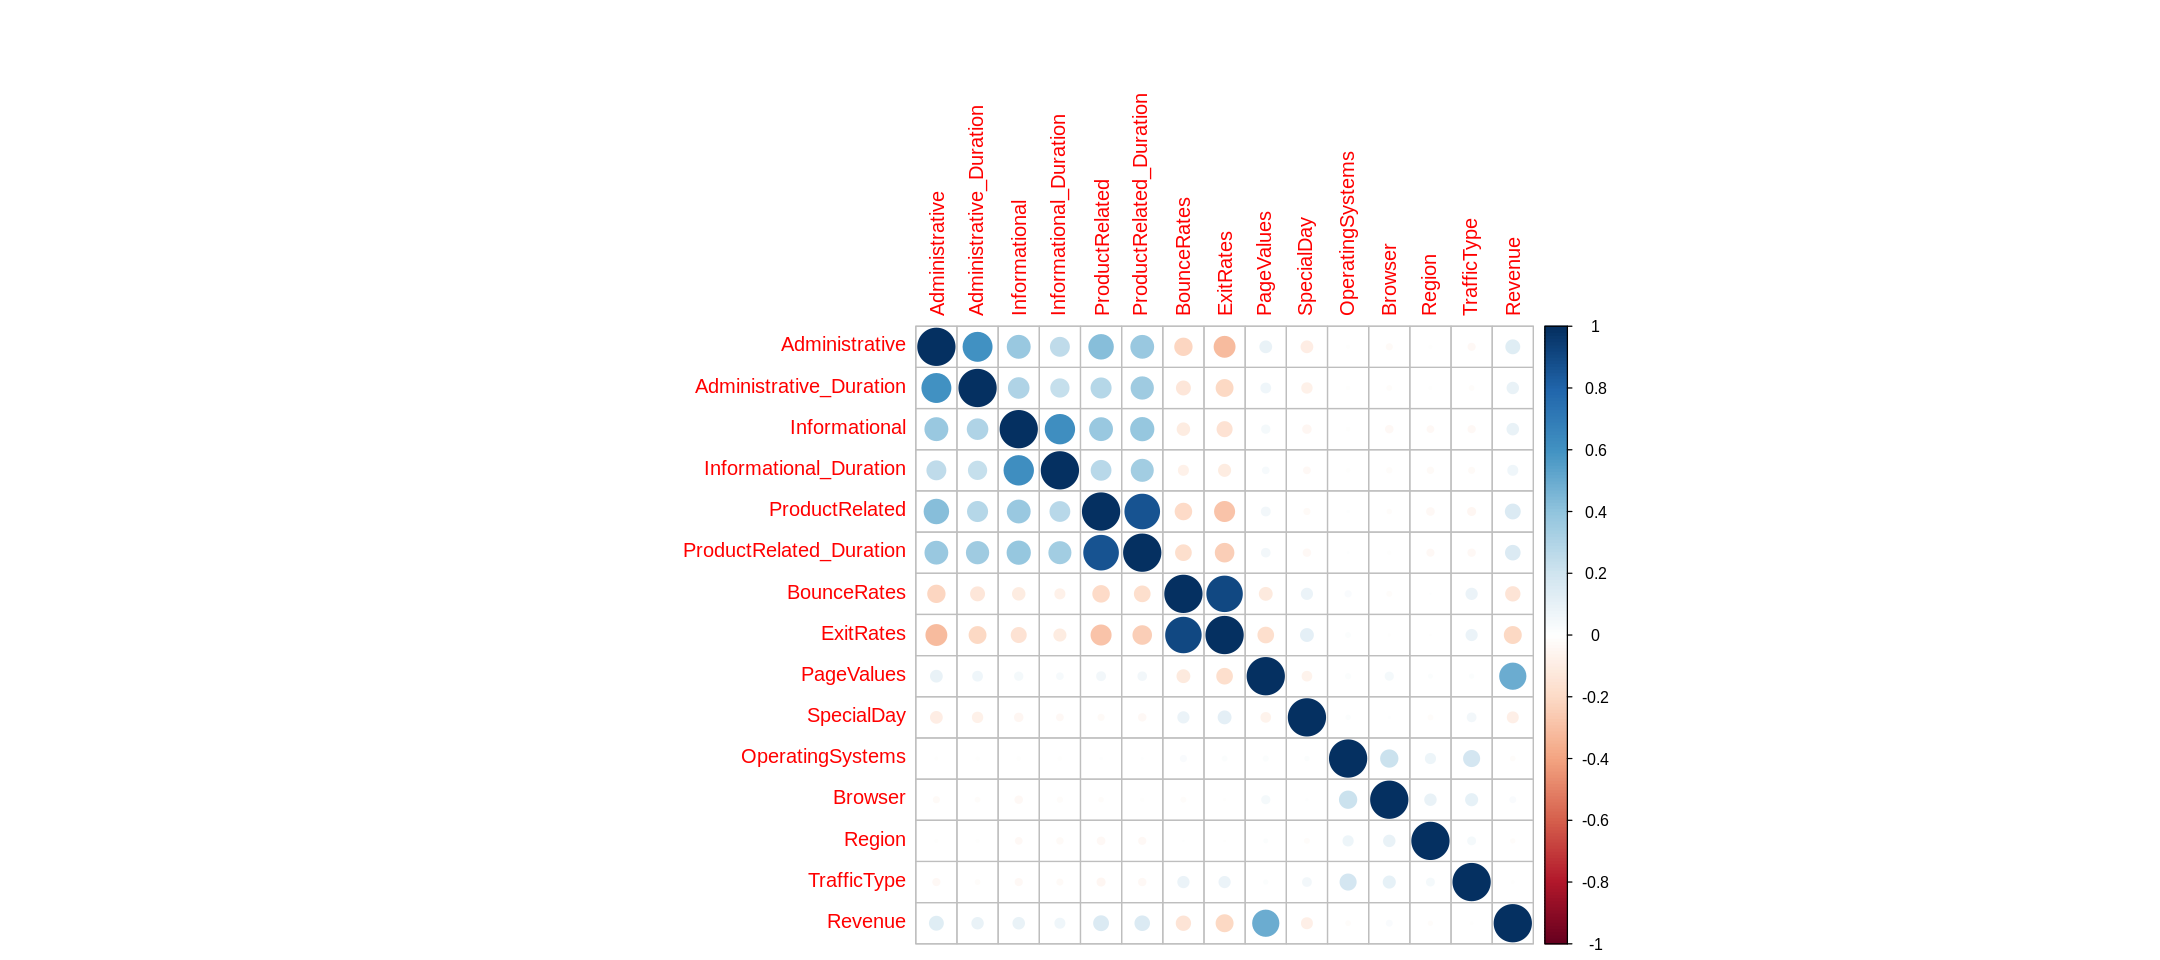

In [ ]:
corrplot(cor(num_cols))

We can see that people that were on the product page spent less time before making a purchase decision, while those that did not buy anything had higher bounce rates. The administrative duration and administrative variables had similar patterns as did informational and informational duration. 

These variables also display a high degree of correlation:
- Administrative and administrative duration
- Information and informational duration
- Product and product related duration

## c) Multivariate Analysis

In [ ]:
# install the farver package which eliminates the color decoding error.
install.packages("farver")
require(farver)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: farver



In [ ]:
#Factorizing categorical variables in our dataset.
Data$VisitorType <- as.integer(as.factor(Data$VisitorType))
Data$Month <- as.integer(as.factor(Data$Month))
Data$Weekend <- as.integer(as.factor(Data$Weekend))

In [ ]:
#Using the principal component analysis to check for component variance.
Data.pca <- prcomp(Data[,c(1:17)], center = TRUE, scale. = TRUE)
summary(Data.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     1.8418 1.3443 1.17612 1.08672 1.03792 1.01241 0.98906
Proportion of Variance 0.1996 0.1063 0.08137 0.06947 0.06337 0.06029 0.05754
Cumulative Proportion  0.1996 0.3059 0.38722 0.45669 0.52006 0.58035 0.63789
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.97710 0.96616 0.93513 0.91878 0.89901 0.87065 0.64988
Proportion of Variance 0.05616 0.05491 0.05144 0.04966 0.04754 0.04459 0.02484
Cumulative Proportion  0.69405 0.74896 0.80040 0.85006 0.89760 0.94219 0.96703
                          PC15    PC16    PC17
Standard deviation     0.59341 0.35184 0.29071
Proportion of Variance 0.02071 0.00728 0.00497
Cumulative Proportion  0.98775 0.99503 1.00000

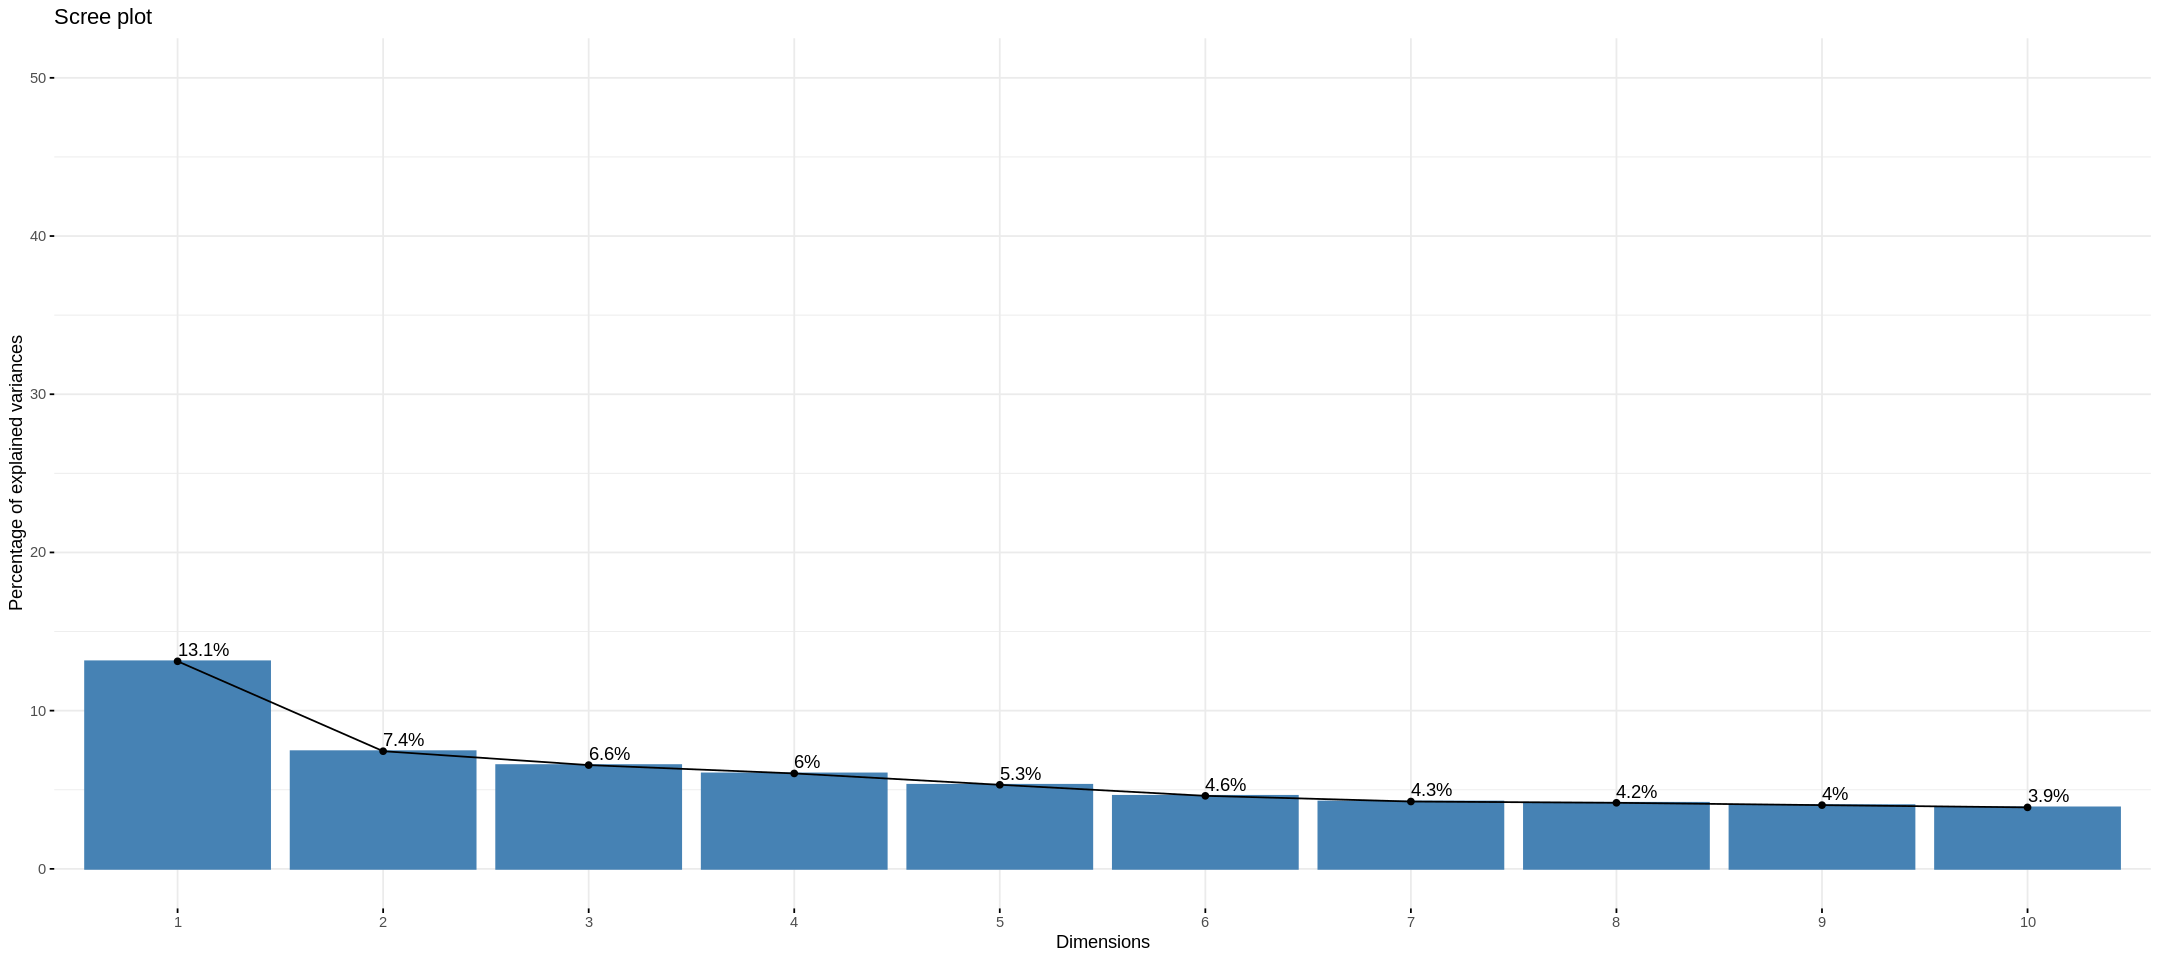

In [ ]:
# Normalising the data
Dataset = as.data.frame(apply(Dataset, 2,  function(x) (x - min(x))/max(x) - min(x)))

library(factoextra)
library(FactoMineR)
res.pca <- PCA(Dataset,  graph = FALSE)# Visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

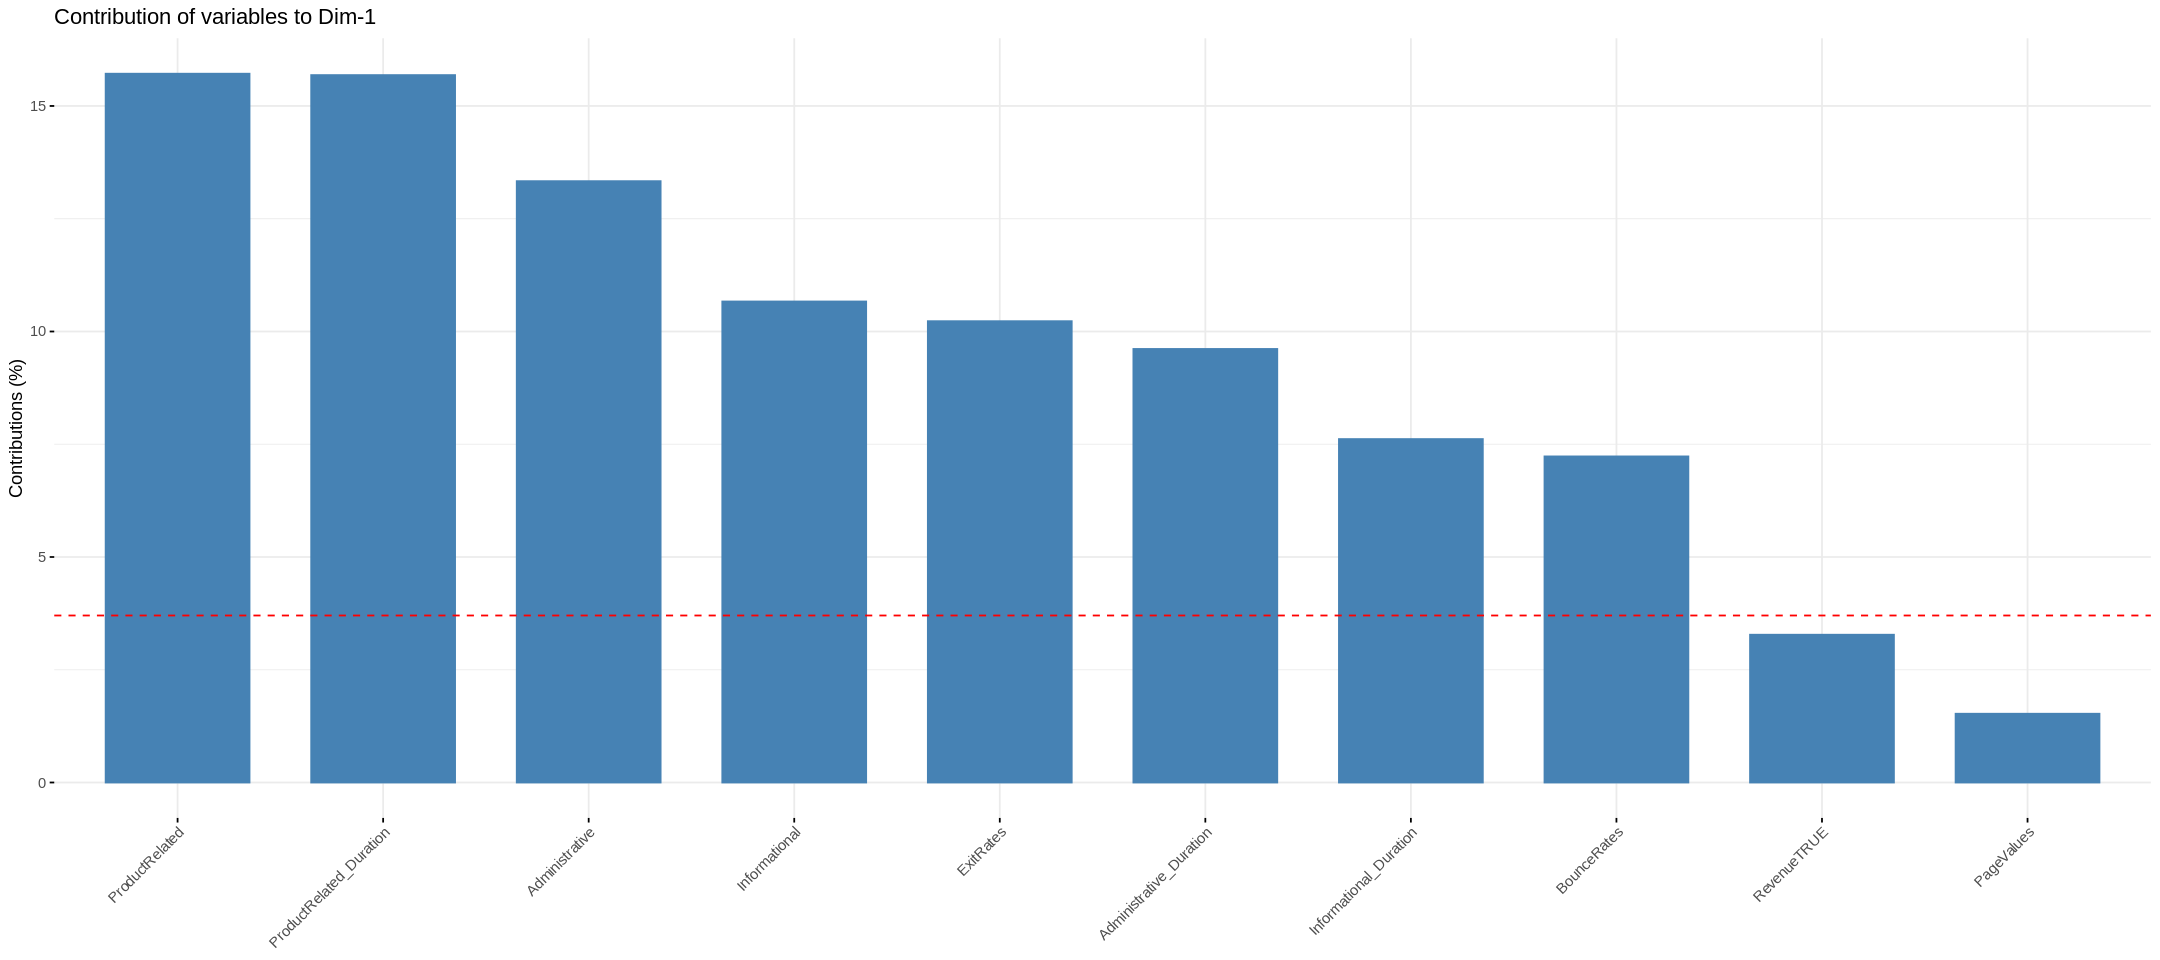

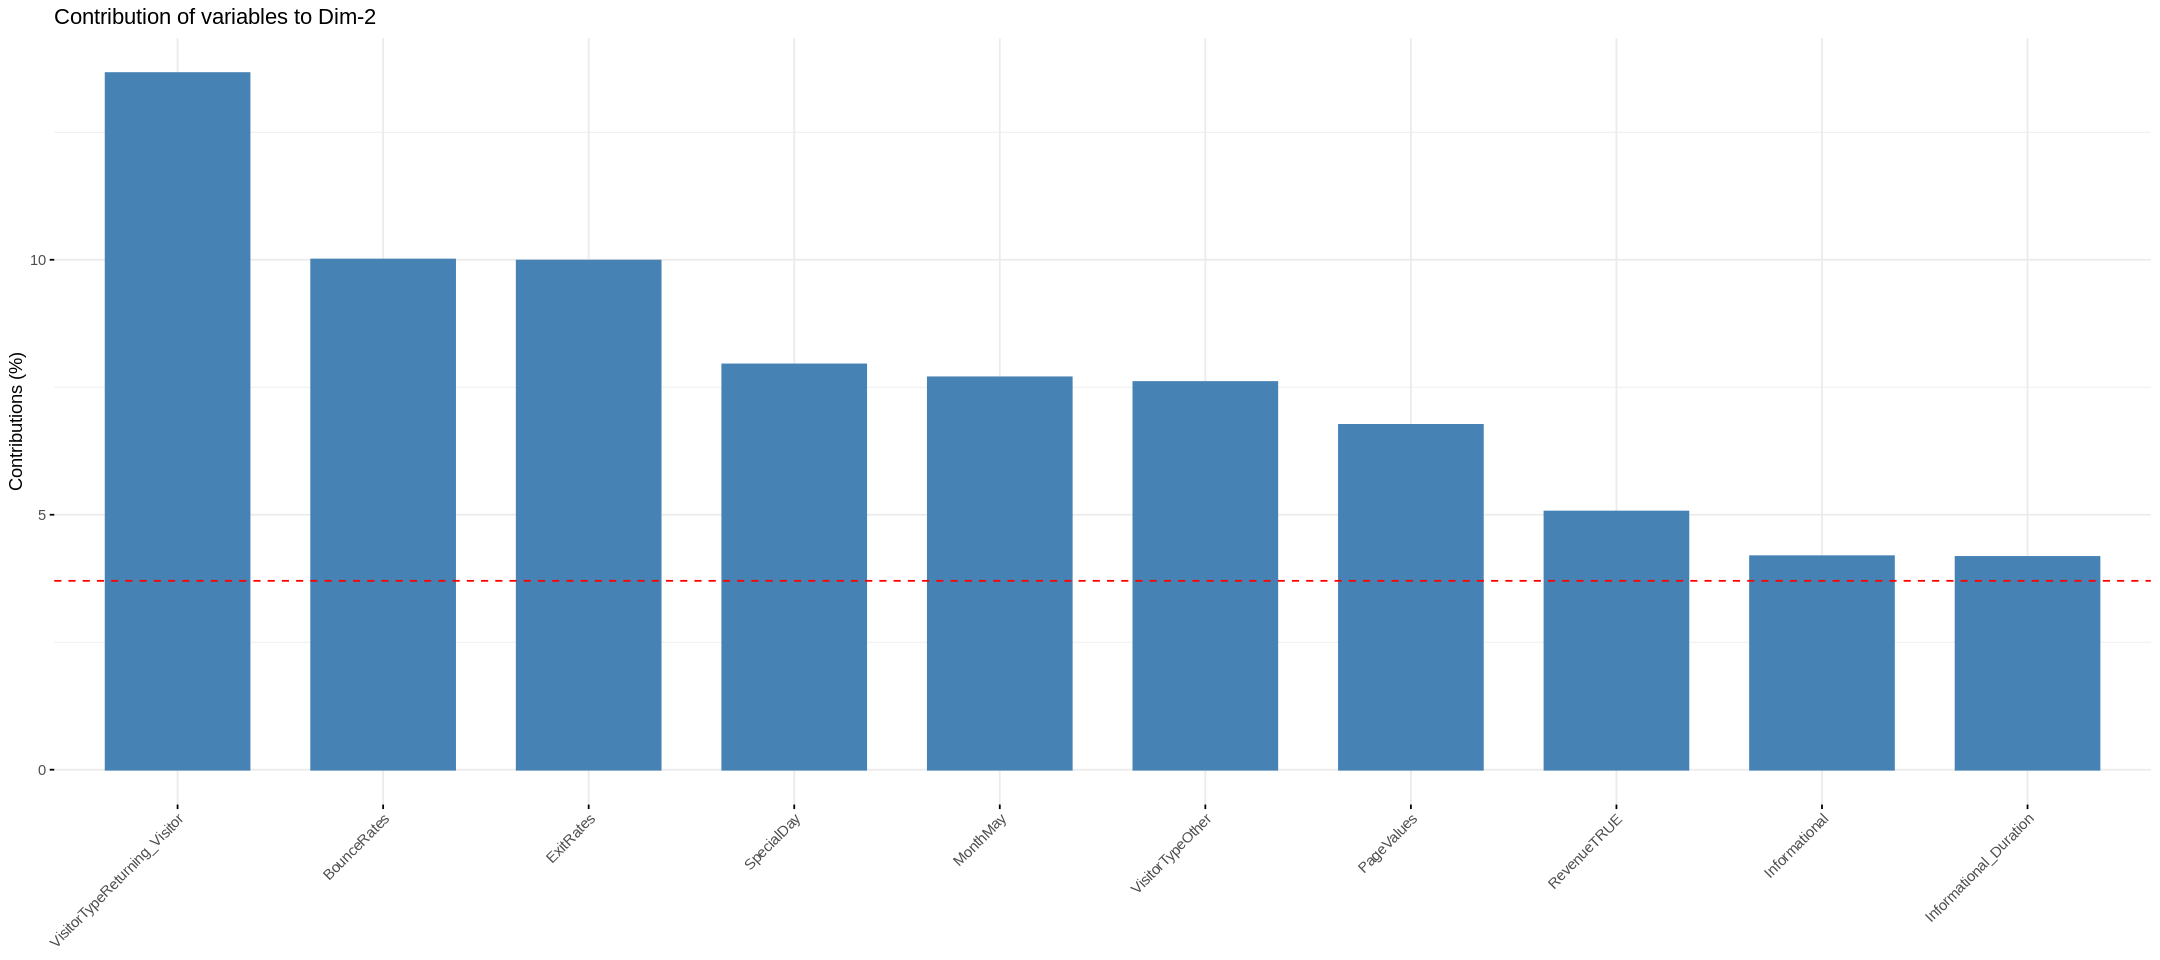

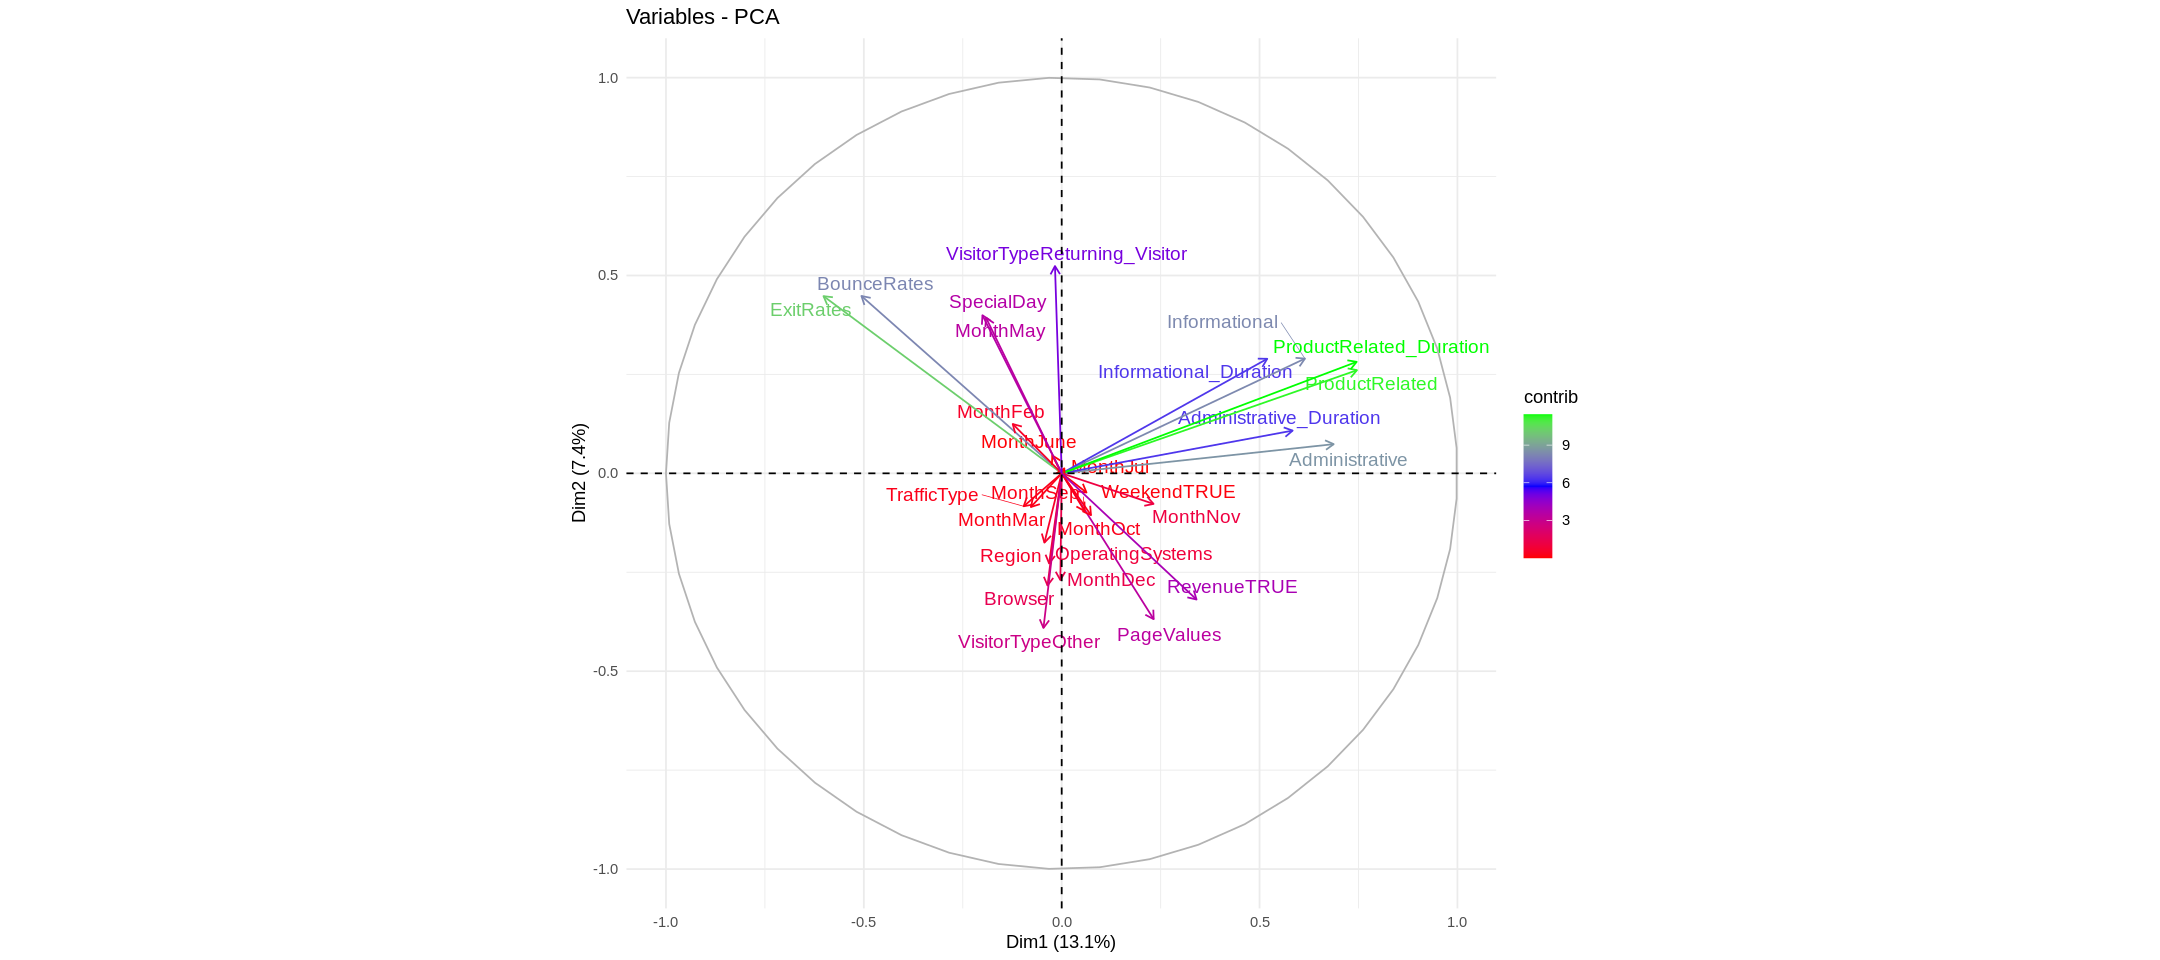

In [ ]:
# Extract the results for variables
var <- get_pca_var(res.pca)# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("red", "blue", "green"),
             repel = TRUE) + theme_minimal() + ggtitle("Variables - PCA")

# below we can see the 10 features with highest contribution

- We can see that these ten variables account for most of the variance in the dataset. 
- The BounceRates, ExitRates variables increase together while informational, informational duration, product related duration, product related, administrative duration and administrative also increase together. These two groups are inversley proportional. 
- The traffic type, region, browser and visitor type variables also increase together while page values, revenue and weekend increase together. These two groups are also inversely proprtional. 

# 9. Implementing the Solution

In [118]:

library(CatEncoders)
# Saving names of categorical variables
factors <- names(which(sapply(sol, is.factor)))

# Label Encoder
for (i in factors){
  encode <- LabelEncoder.fit(sol[, i])
  sol[, i] <- transform(encode, sol[, i])
}
head(sol)


Attaching package: ‘CatEncoders’


The following object is masked from ‘package:base’:

    transform




Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType VisitorType
1 0          3     1                1       1      1           3          
2 0          3     2                2       1      2           3          
3 0          3     4                1       9      3           3          
4 0          3     3                2       2      4           3          
5 0          3     3                3       1      4           3          
6 0          3     2                2       1      3           3          
  Weekend Revenue
1 1       1      
2 1       1      
3 1       1      
4 1       1      
5 2       1      
6 1       1

In [115]:
sol <- cbind(Data)
dim(sol)

sol$Revenue <- as.factor(sol$Revenue)
sol$Weekend <- as.factor(sol$Weekend)

[1] 12213    18

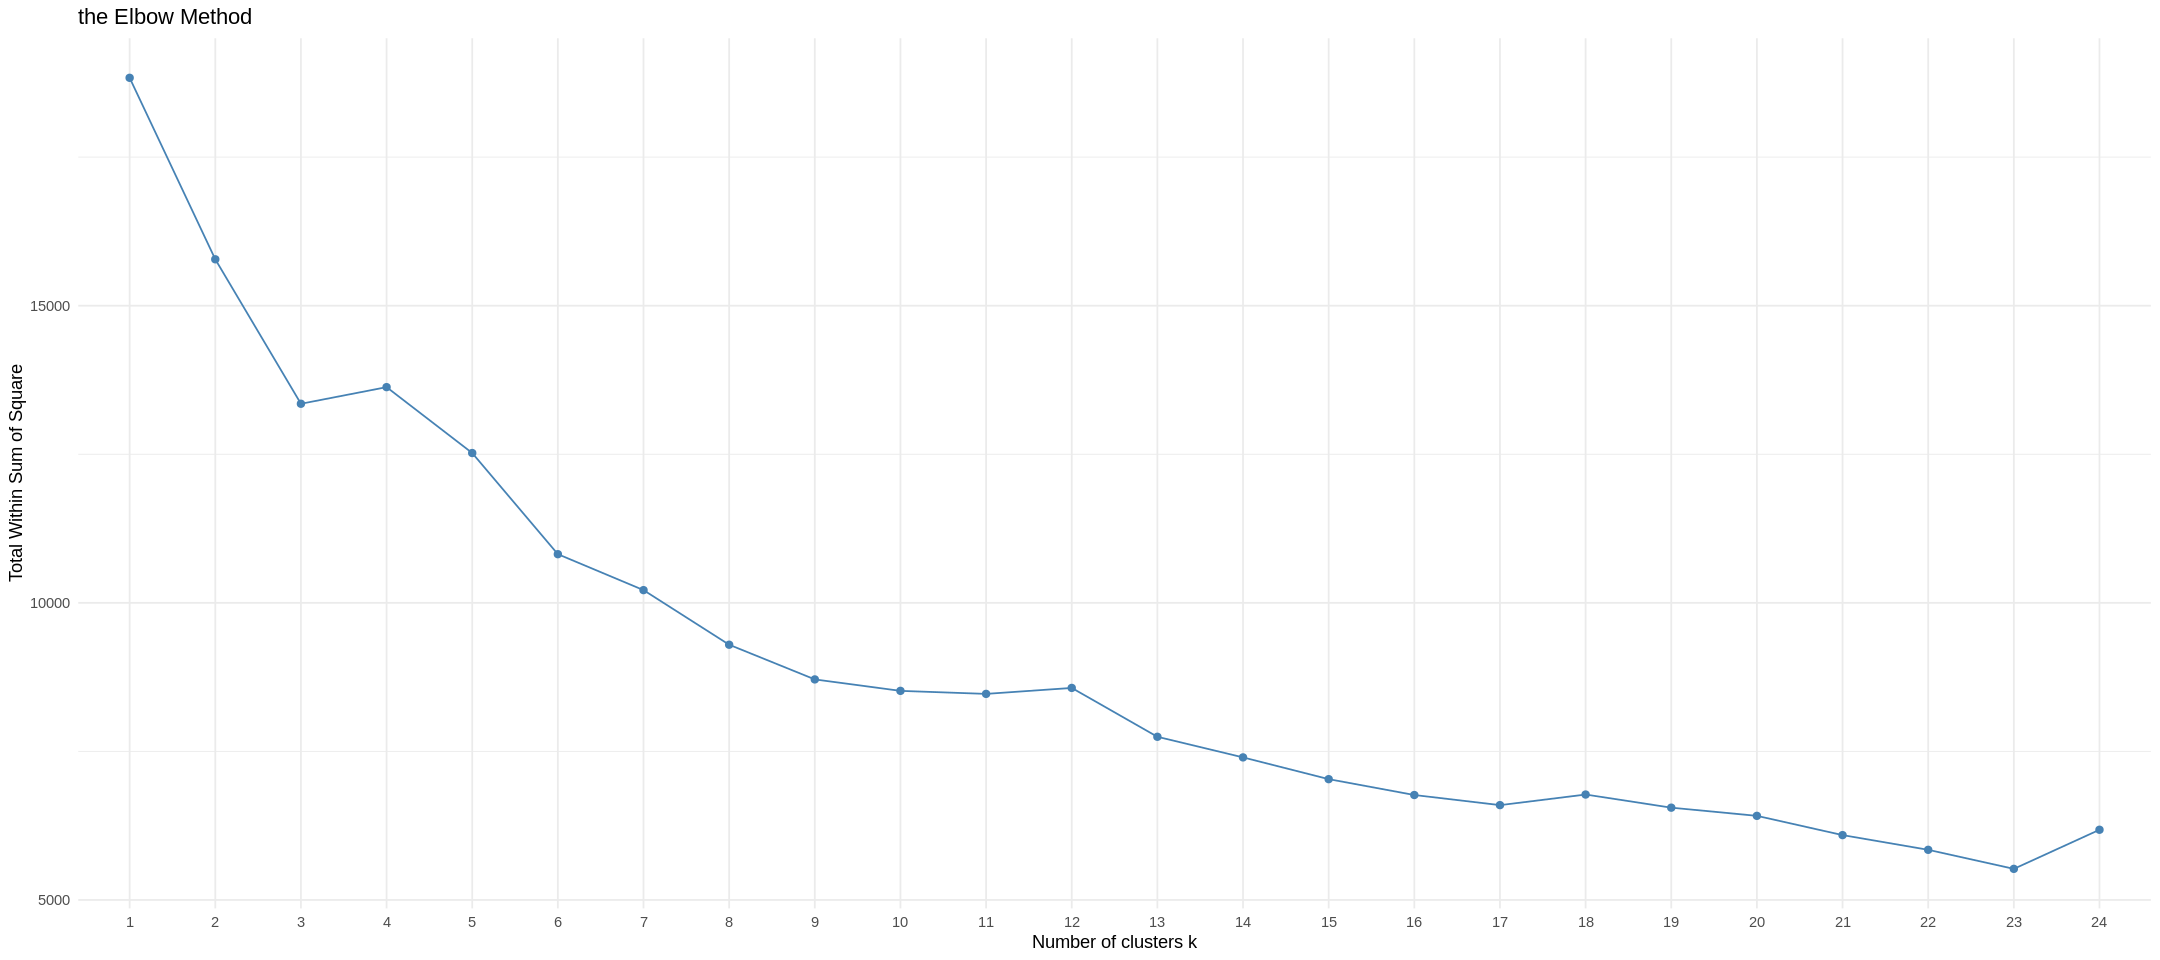

In [120]:
# find the optimal value of K using the elbow method
set.seed(0)
# function to compute total within-cluster sum of squares
fviz_nbclust(Dataset, kmeans, method = "wss", k.max = 24) + theme_minimal() + ggtitle("the Elbow Method")

In [117]:
install.packages("CatEncoders")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The optimal number of clusters is found to be three

In [121]:
kmeans_model = kmeans(sol, 3)

In [122]:
kmeans_model$centers

Administrative Administrative_Duration Informational Informational_Duration
1 1.842619        62.82159               0.3313067      20.19601             
2 7.439614       295.36489               2.7487923     266.72309             
3 4.324886       154.85382               1.1743538      84.73057             
  ProductRelated ProductRelated_Duration BounceRates ExitRates  PageValues
1  18.83614        584.2359              0.023368833 0.04586244 5.567061  
2 236.10628      10886.1744              0.005939756 0.01968831 4.521370  
3  77.77293       3356.5135              0.007126288 0.02167382 8.020426  
  SpecialDay Month    OperatingSystems Browser  Region   TrafficType
1 0.06472640 6.090103 2.121300         2.367786 3.176119 4.155387   
2 0.03091787 6.782609 2.149758         2.309179 2.584541 3.618357   
3 0.05078561 6.498733 2.136341         2.311201 3.092752 3.706031   
  VisitorType Weekend  Revenue 
1 2.673876    1.236818 1.133858
2 2.985507    1.251208 1.338164
3 2.902686    1.218449 1.250887

In [123]:
kmeans_model$size

[1] 10033   207  1973

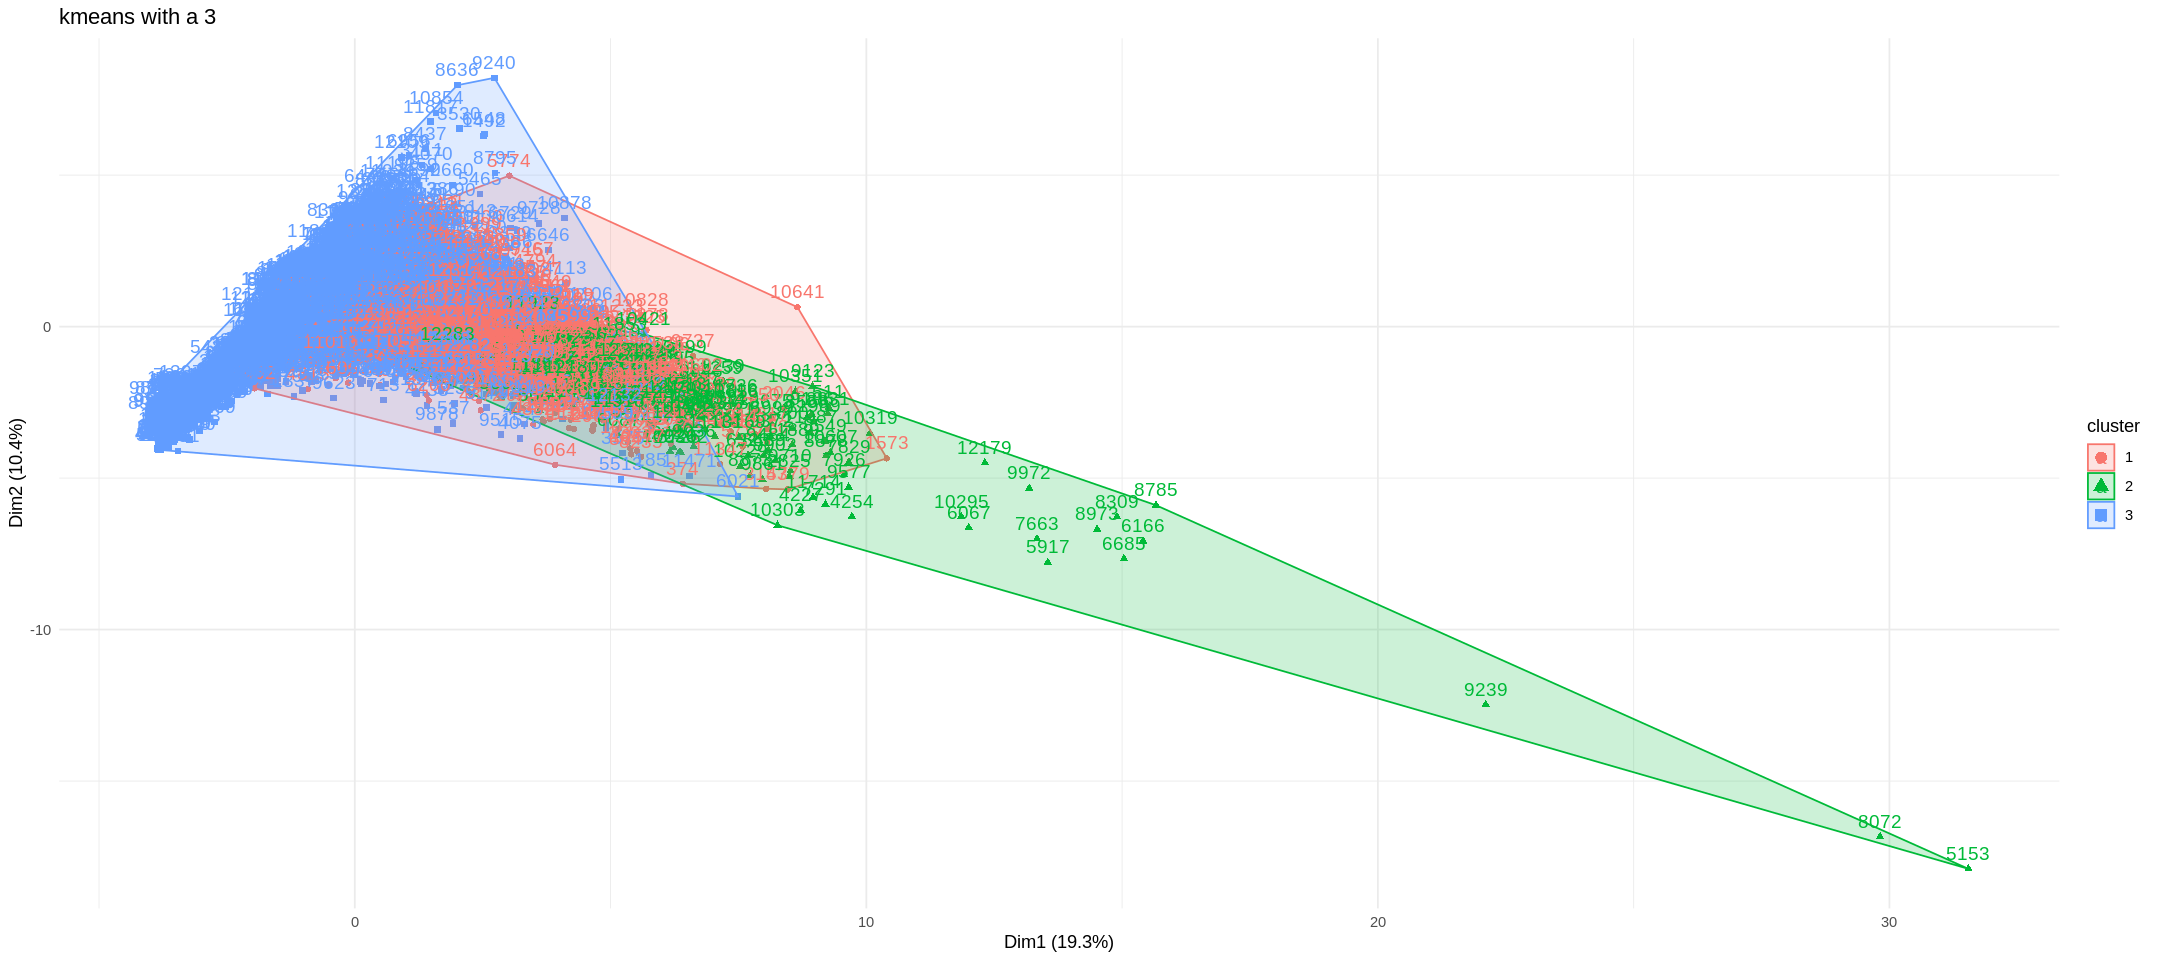

In [126]:
# run kmeans 
final <- kmeans(sol, 3, nstart = 30)
fviz_cluster(final, data = sol) + theme_minimal() + ggtitle("kmeans with a 3")

In [128]:
install.packages("kableExtra")
library(kableExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘webshot’



Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows




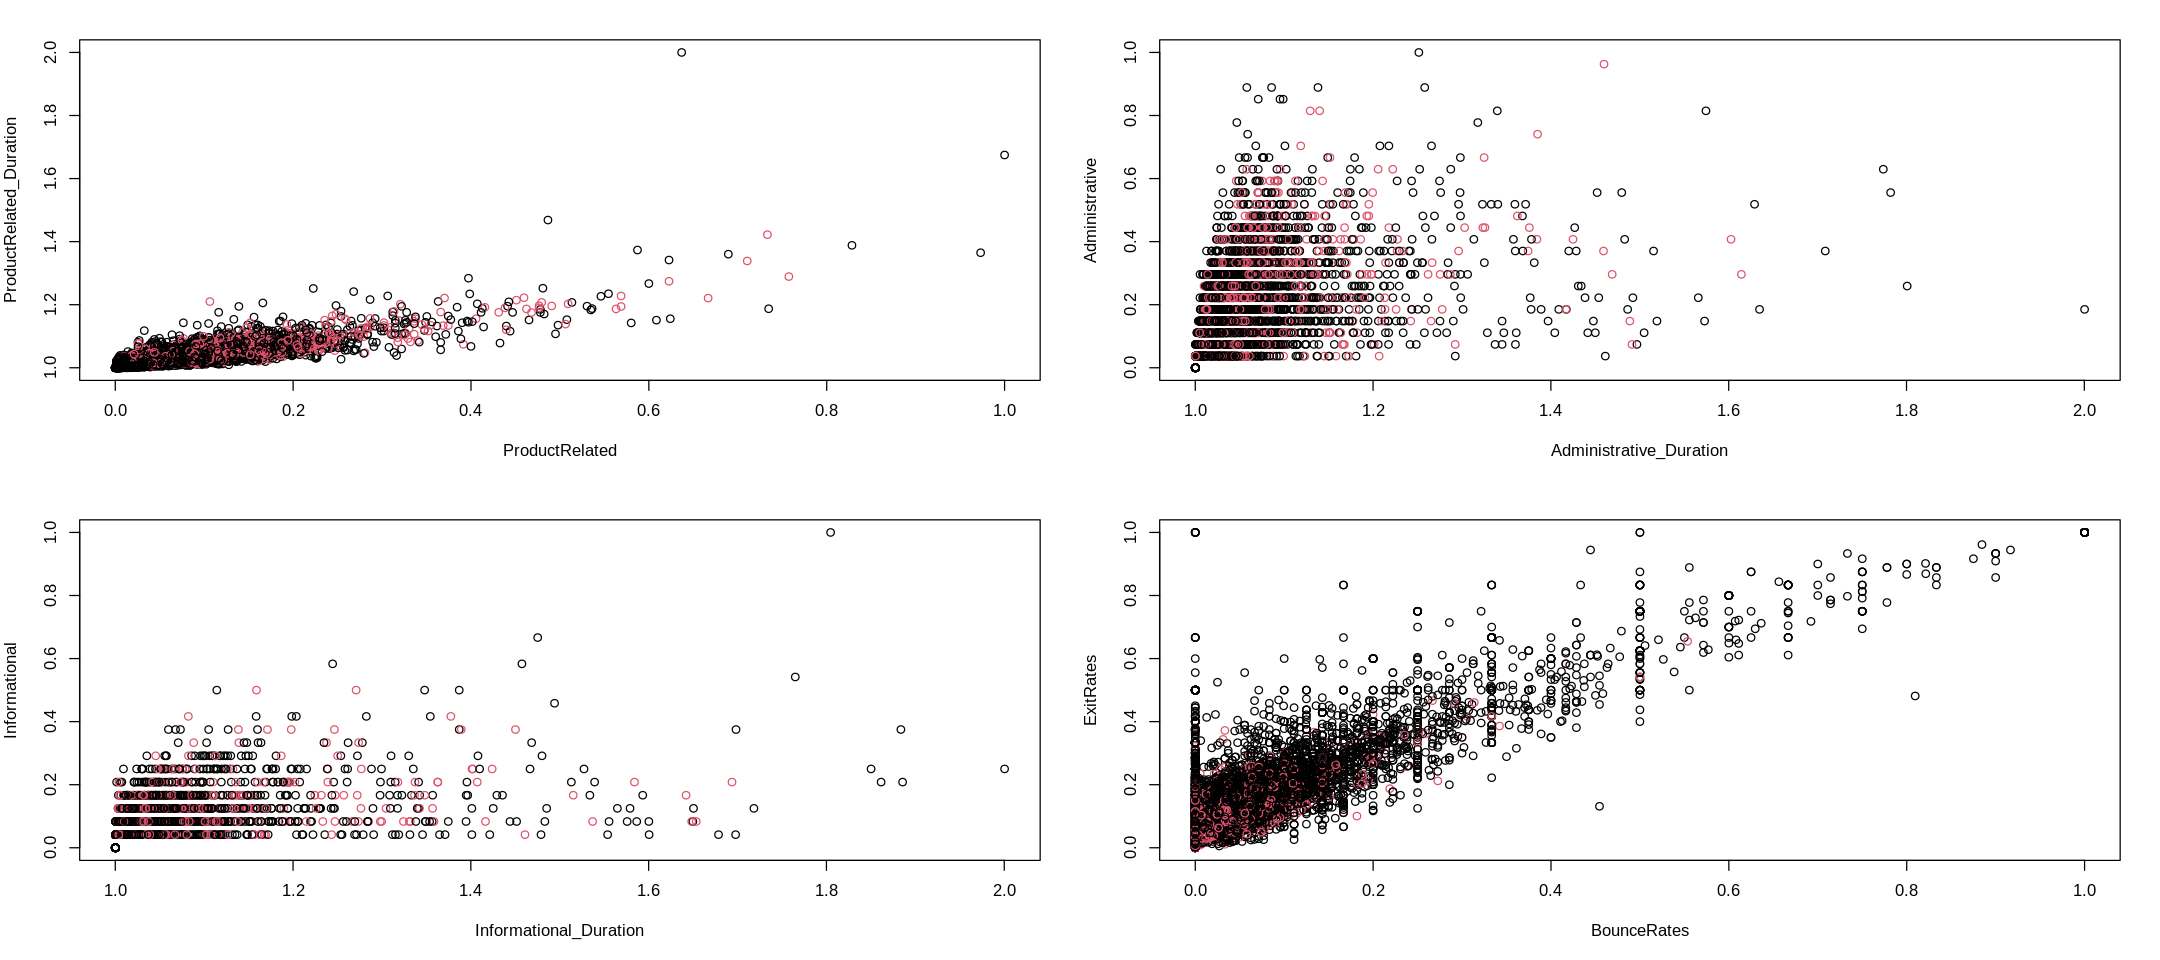

In [ ]:
# Visualizing the  known clusters
# ---
# 
par(mfrow = c(2,2), mar = c(5,4,2,2))

# Plotting to see how Ozone and Solar.R data points have been distributed in clusters
RevenueTRUE <- Dataset$RevenueTRUE
#
Dataset$RevenueTRUE= factor(Dataset$RevenueTRUE)
RevenueTRUE <- Dataset$RevenueTRUE

plot(Dataset[,c('ProductRelated','ProductRelated_Duration')], col = RevenueTRUE) 
plot(Dataset[,c('Administrative_Duration', 'Administrative')], col = RevenueTRUE)

# 
plot(Dataset[,c('Informational_Duration', 'Informational')], col = RevenueTRUE)

#
plot(Dataset[,c('BounceRates','ExitRates')], col = RevenueTRUE)

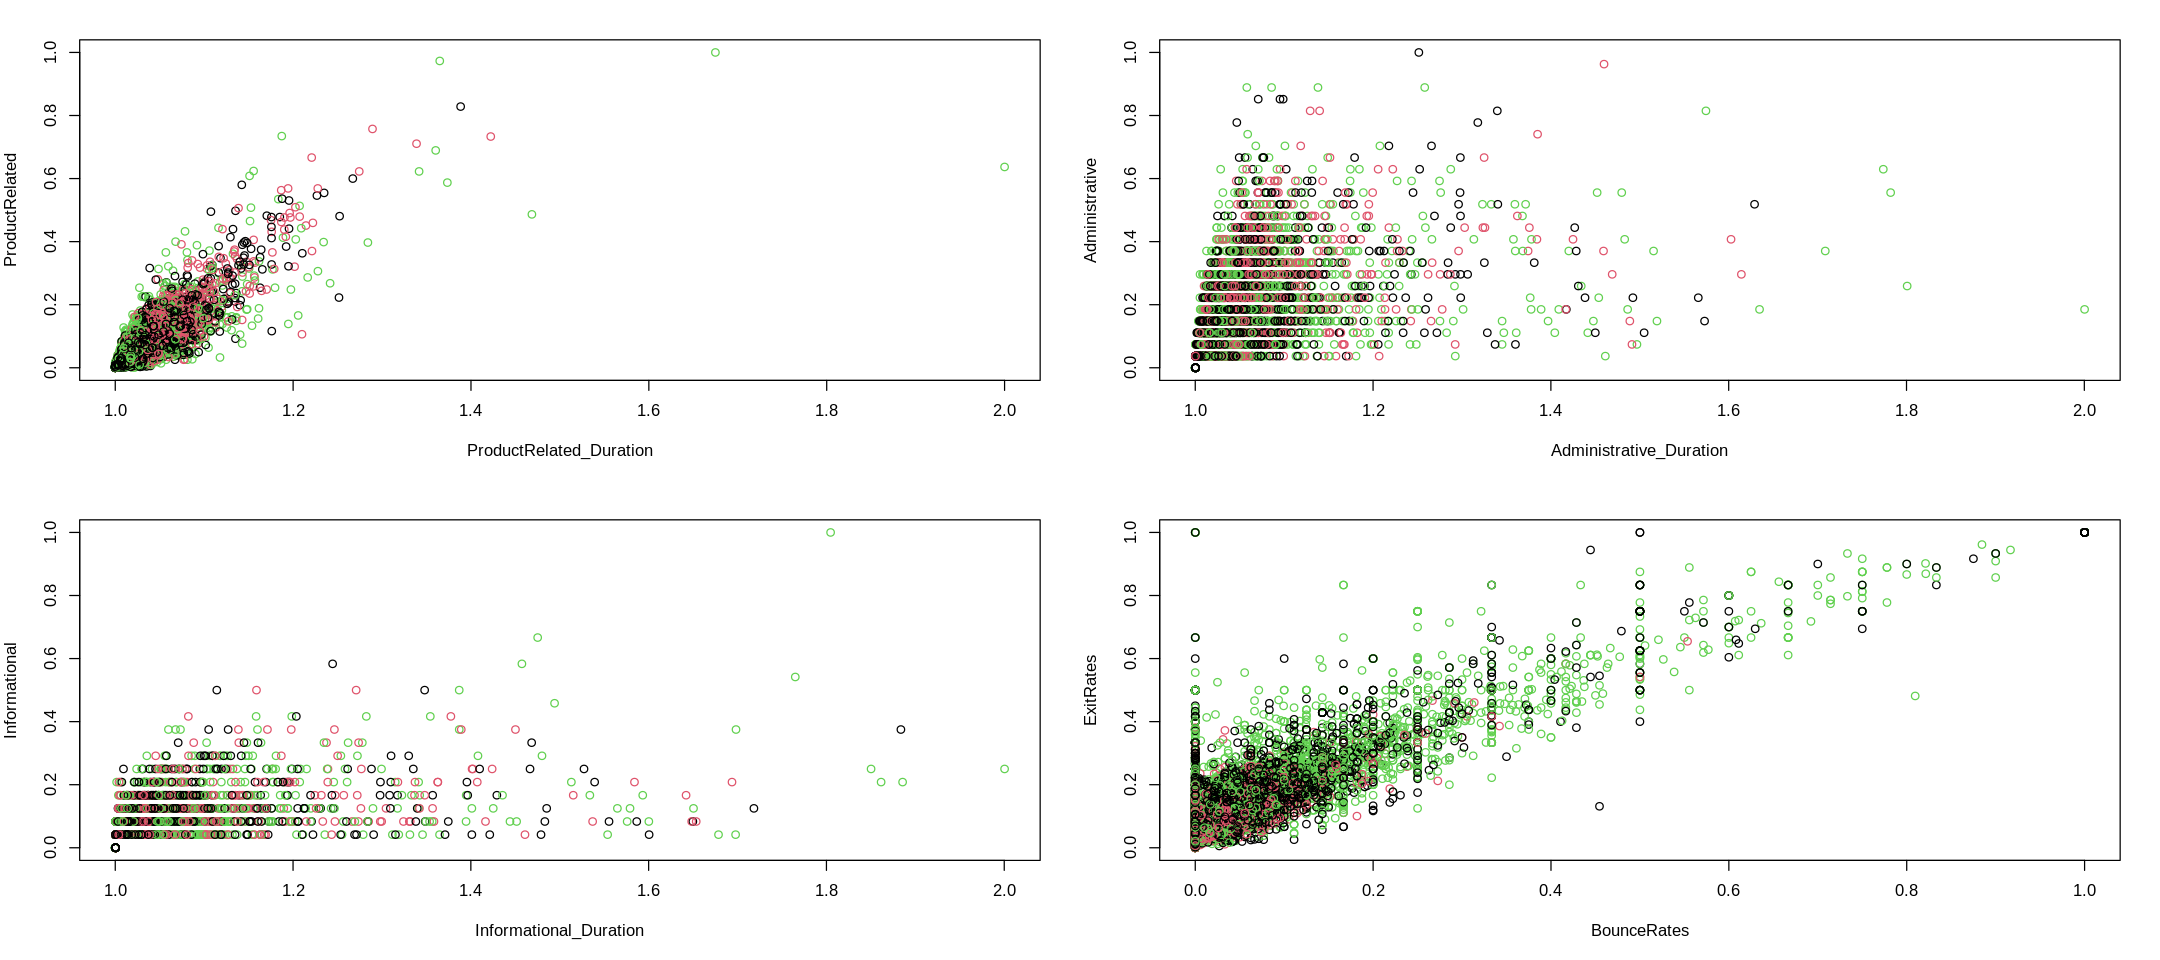

In [ ]:
# Verifying the results of clustering
# ---
# 
par(mfrow = c(2,2), mar = c(5,4,2,2))

# 
plot(Dataset[,c('ProductRelated_Duration', 'ProductRelated')], col = kmeans_model$cluster)

#
plot(Dataset[,c('Administrative_Duration', 'Administrative')], col = kmeans_model$cluster)

# 
plot(Dataset[,c('Informational_Duration', 'Informational')], col = kmeans_model$cluster)

#
plot(Dataset[,c('BounceRates','ExitRates')], col = kmeans_model$cluster)

In [129]:
as.data.frame(sol) %>% mutate(Cluster = final$cluster) %>% group_by(Cluster) %>% summarise_all("mean") %>% kable() %>% kable_styling()

<table class="table" style="margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:right;"> Cluster </th>
   <th style="text-align:right;"> Administrative </th>
   <th style="text-align:right;"> Administrative_Duration </th>
   <th style="text-align:right;"> Informational </th>
   <th style="text-align:right;"> Informational_Duration </th>
   <th style="text-align:right;"> ProductRelated </th>
   <th style="text-align:right;"> ProductRelated_Duration </th>
   <th style="text-align:right;"> BounceRates </th>
   <th style="text-align:right;"> ExitRates </th>
   <th style="text-align:right;"> PageValues </th>
   <th style="text-align:right;"> SpecialDay </th>
   <th style="text-align:right;"> Month </th>
   <th style="text-align:right;"> OperatingSystems </th>
   <th style="text-align:right;"> Browser </th>
   <th style="text-align:right;"> Region </th>
   <th style="text-align:right;"> TrafficType </th>
   <th style="text-align:right;"> VisitorType </th>
   <th

In [130]:
# install the ggiraphExtra package to use to plot the ggradar graph
install.packages("ggiraphExtra")
require(ggiraphExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘insight’, ‘ggiraph’, ‘mycor’, ‘ppcor’, ‘sjlabelled’, ‘sjmisc’


Loading required package: ggiraphExtra



Joining, by = "rowname"



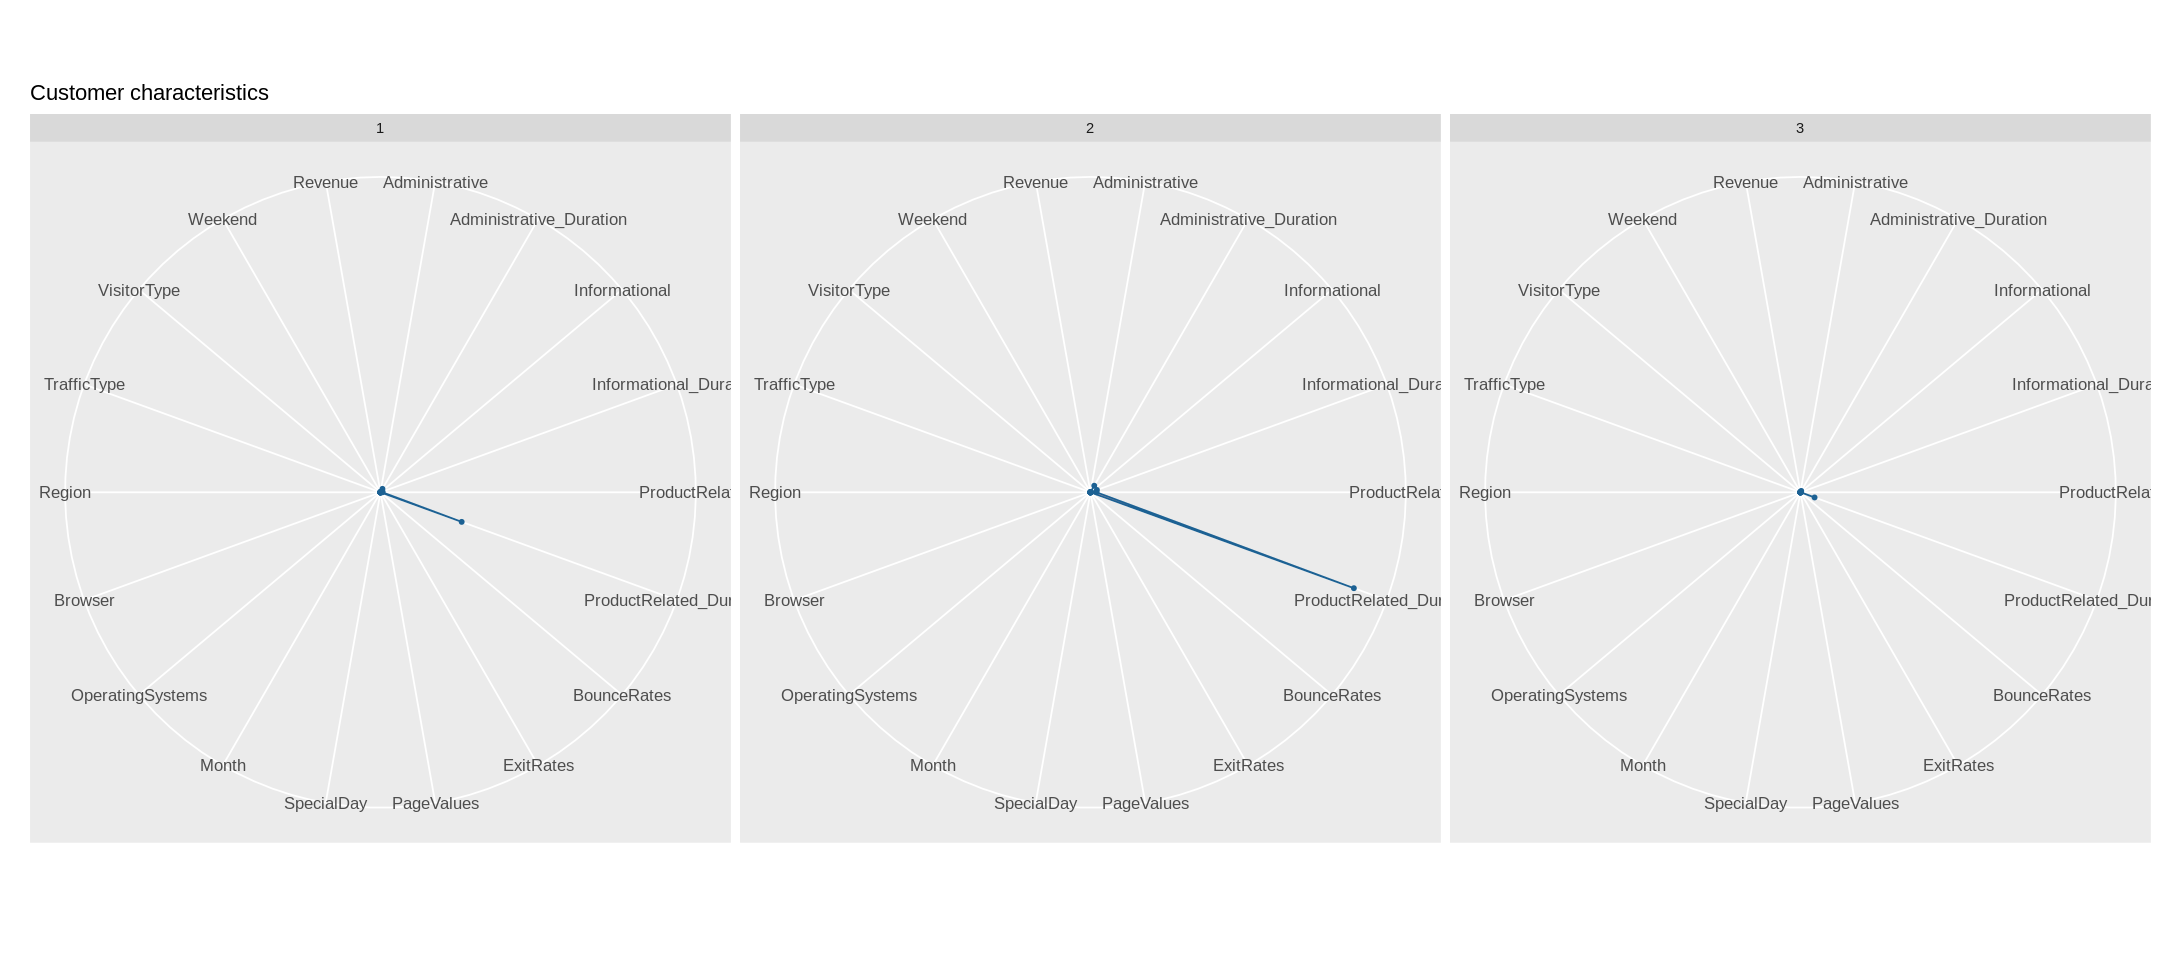

In [131]:
# plot a radar plot for the characteristics of different clusters
library(ggiraphExtra)

# convert rownames to the first column from the sol data frame
sol_df <- as.data.frame(sol) %>% rownames_to_column()

# convert rownames to the first column from the cluster data
cluster_pos <- as.data.frame(final$cluster) %>% rownames_to_column()

# get the column names
colnames(cluster_pos) <- c("rowname", "cluster")

# join the cluster_position and sol_df data
sol_final <- inner_join(cluster_pos, sol_df)

# radar plot
ggRadar(sol_final[-1], aes(group = cluster), rescale = FALSE, legend.position = "none", size = 1, interactive = FALSE, use.label = TRUE) + facet_wrap(~cluster) + scale_y_discrete(breaks = NULL) + # don't show ticks
theme(axis.text.x = element_text(size = 10)) + scale_fill_manual(values = rep("red", nrow(sol_final))) +
scale_color_manual(values = rep("#1c6193", nrow(sol_final))) +
ggtitle("Customer characteristics")

In [138]:
# load the clValid package which will help us find the best algorithm to use and cluster information
install.packages("clValid")
require(clValid)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: clValid



In [139]:
# cross validation of 500 rows cluster sizes of range (2 to 24) methods are hierarchical, kmeans and pam.
intern <- clValid(sol[1:500,], nClust = 2:24, 
              clMethods = c("hierarchical","kmeans","pam"), validation = "internal")

In [141]:
# find summary statistics
library(kableExtra)
summary(intern) %>% kable() %>% kable_styling()


Clustering Methods:
 hierarchical kmeans pam 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

Validation Measures:
                                  2        3        4        5        6        7        8        9       10       11       12       13       14       15       16       17       18       19       20       21       22       23       24
                                                                                                                                                                                                                                         
hierarchical Connectivity    2.9290   9.2421  15.3948  18.6266  23.9873  29.8242  32.6004  36.1246  39.7325  41.2921  44.4254  50.7143  52.8810  56.5960  60.4540  63.2040  71.2579  73.9758  74.6758  80.2972  81.7734  83.2734  88.4325
             Dunn            0.3316   0.0787   0.0968   0.0968   0.0324   0.0324   0.0324   0.0419   0.0420   0.0420   0.0420   0.0533   0.0533   0.05

<table class="table" style="margin-left: auto; margin-right: auto;">
<tbody>
  <tr>

  </tr>
</tbody>
</table>

The optimal number of clusters appears to be 2

We now try the heirachical clustering 

In [132]:
X <- Dataset[,-27]
hclust <- hclust(dist(X), method = "average")

In [133]:
# extract heights of the dendogram
round(hclust$height, 3)

[1] 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
   [13] 0.000 0.000 0.000 0.000 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
   [25] 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
   [37] 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
   [49] 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.002 0.002 0.002 0.002 0.002
   [61] 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.003 0.003 0.003 0.003 0.003
   [73] 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003 0.003
   [85] 0.003 0.003 0.003 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.004 0.005
   [97] 0.005 0.005 0.005 0.005 0.005 0.005 0.006 0.006 0.006 0.006 0.006 0.006
  [109] 0.007 0.007 0.007 0.007 0.007 0.007 0.008 0.008 0.008 0.008 0.008 0.009
  [121] 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.010 0.010 0.010 0.010
  [133] 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012
  [145] 0.012 0.012 0.012 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013
  [157] 0.013 0.014 0.014 0.014 0.014 0.014 0.014 0.014 0.015 0.015 0.015 0.015
  [169] 0.015 0.015 0.015 0.016 0.016 0.016 0.016 0.016 0.016 0.016 0.016 0.016
  [181] 0.016 0.017 0.017 0.017 0.017 0.017 0.017 0.017 0.018 0.018 0.018 0.018
  [193] 0.018 0.018 0.018 0.019 0.019 0.019 0.019 0.019 0.019 0.019 0.019 0.019
  [205] 0.019 0.020 0.020 0.020 0.020 0.020 0.020 0.020 0.020 0.021 0.021 0.021
  [217] 0.021 0.021 0.021 0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.022 0.023
  [229] 0.023 0.023 0.023 0.023 0.023 0.024 0.024 0.024 0.024 0.024 0.024 0.024
  [241] 0.024 0.024 0.024 0.024 0.024 0.025 0.025 0.025 0.025 0.025 0.025 0.025
  [253] 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.026 0.026
  [265] 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.026 0.027 0.027 0.027
  [277] 0.027 0.027 0.027 0.027 0.027 0.027 0.027 0.028 0.028 0.028 0.028 0.028
  [289] 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028 0.028
  [301] 0.028 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029 0.029
  [313] 0.029 0.029 0.029 0.029 0.029 0.030 0.030 0.030 0.030 0.030 0.030 0.030
  [325] 0.030 0.030 0.030 0.030 0.030 0.030 0.030 0.031 0.031 0.031 0.031 0.031
  [337] 0.031 0.031 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032 0.032
  [349] 0.032 0.032 0.032 0.032 0.032 0.033 0.033 0.033 0.033 0.033 0.033 0.033
  [361] 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033 0.033
  [373] 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.035 0.035 0.035 0.035 0.035
  [385] 0.035 0.035 0.035 0.035 0.035 0.035 0.035 0.036 0.036 0.036 0.036 0.036
  [397] 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036 0.036
  [409] 0.036 0.036 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.037
  [421] 0.037 0.037 0.037 0.037 0.037 0.037 0.037 0.038 0.038 0.038 0.038 0.038
  [433] 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038 0.038
  [445] 0.038 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039 0.039
  [457] 0.039 0.039 0.039 0.039 0.040 0.040 0.040 0.040 0.040 0.040 0.040 0.040
  [469] 0.040 0.040 0.040 0.040 0.040 0.040 0.040 0.040 0.041 0.041 0.041 0.041
  [481] 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041 0.041
  [493] 0.041 0.041 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042 0.042
  [505] 0.042 0.042 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043
  [517] 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.043 0.044 0.044
  [529] 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044
  [541] 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.044 0.045
  [553] 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045 0.045
  [565] 0.045 0.045 0.045 0.045 0.045 0.045 0.046 0.046 0.046 0.046 0.046 0.046
  [577] 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046
  [589] 0.046 0.046 0.046 0.047 0.047 0.047 0.047 0.047 0.047 0.047 0.047 0.047
  [6

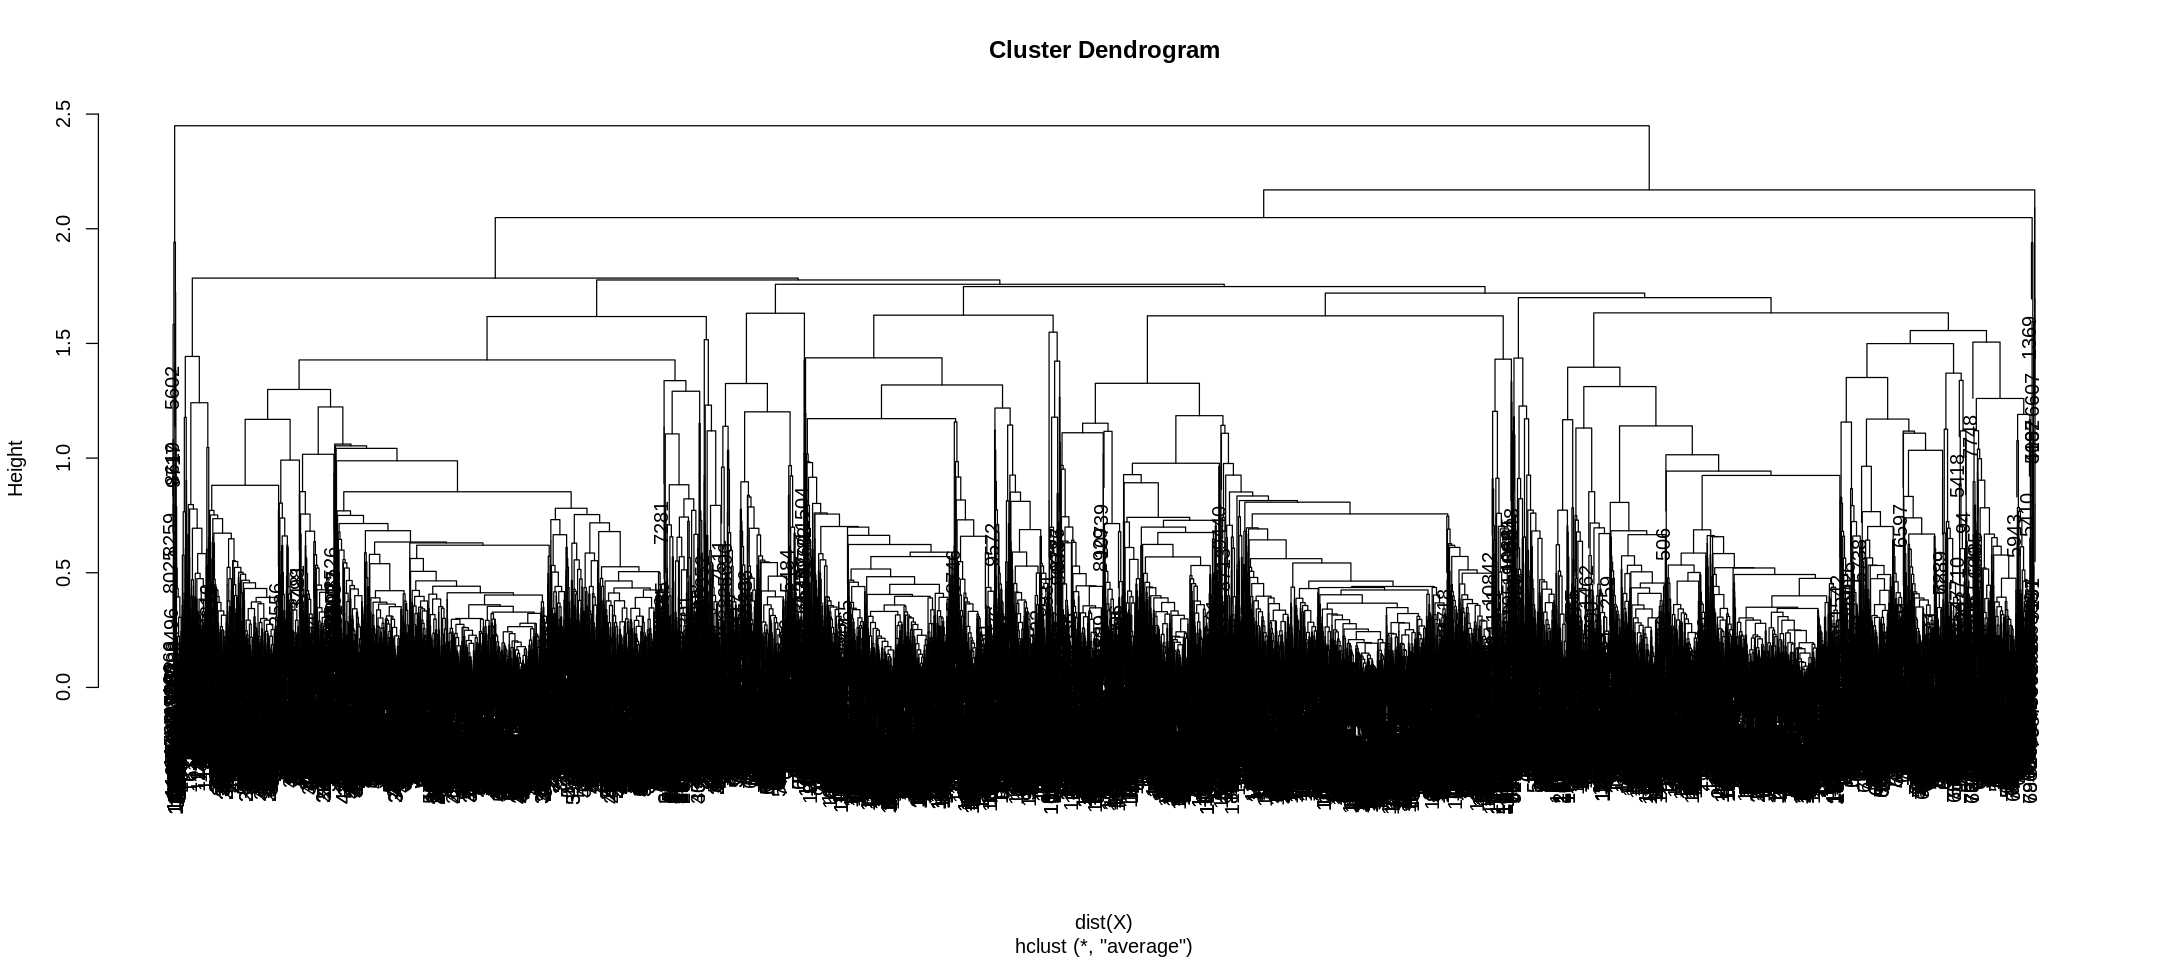

In [134]:
# plot the dendograms
plot(hclust)

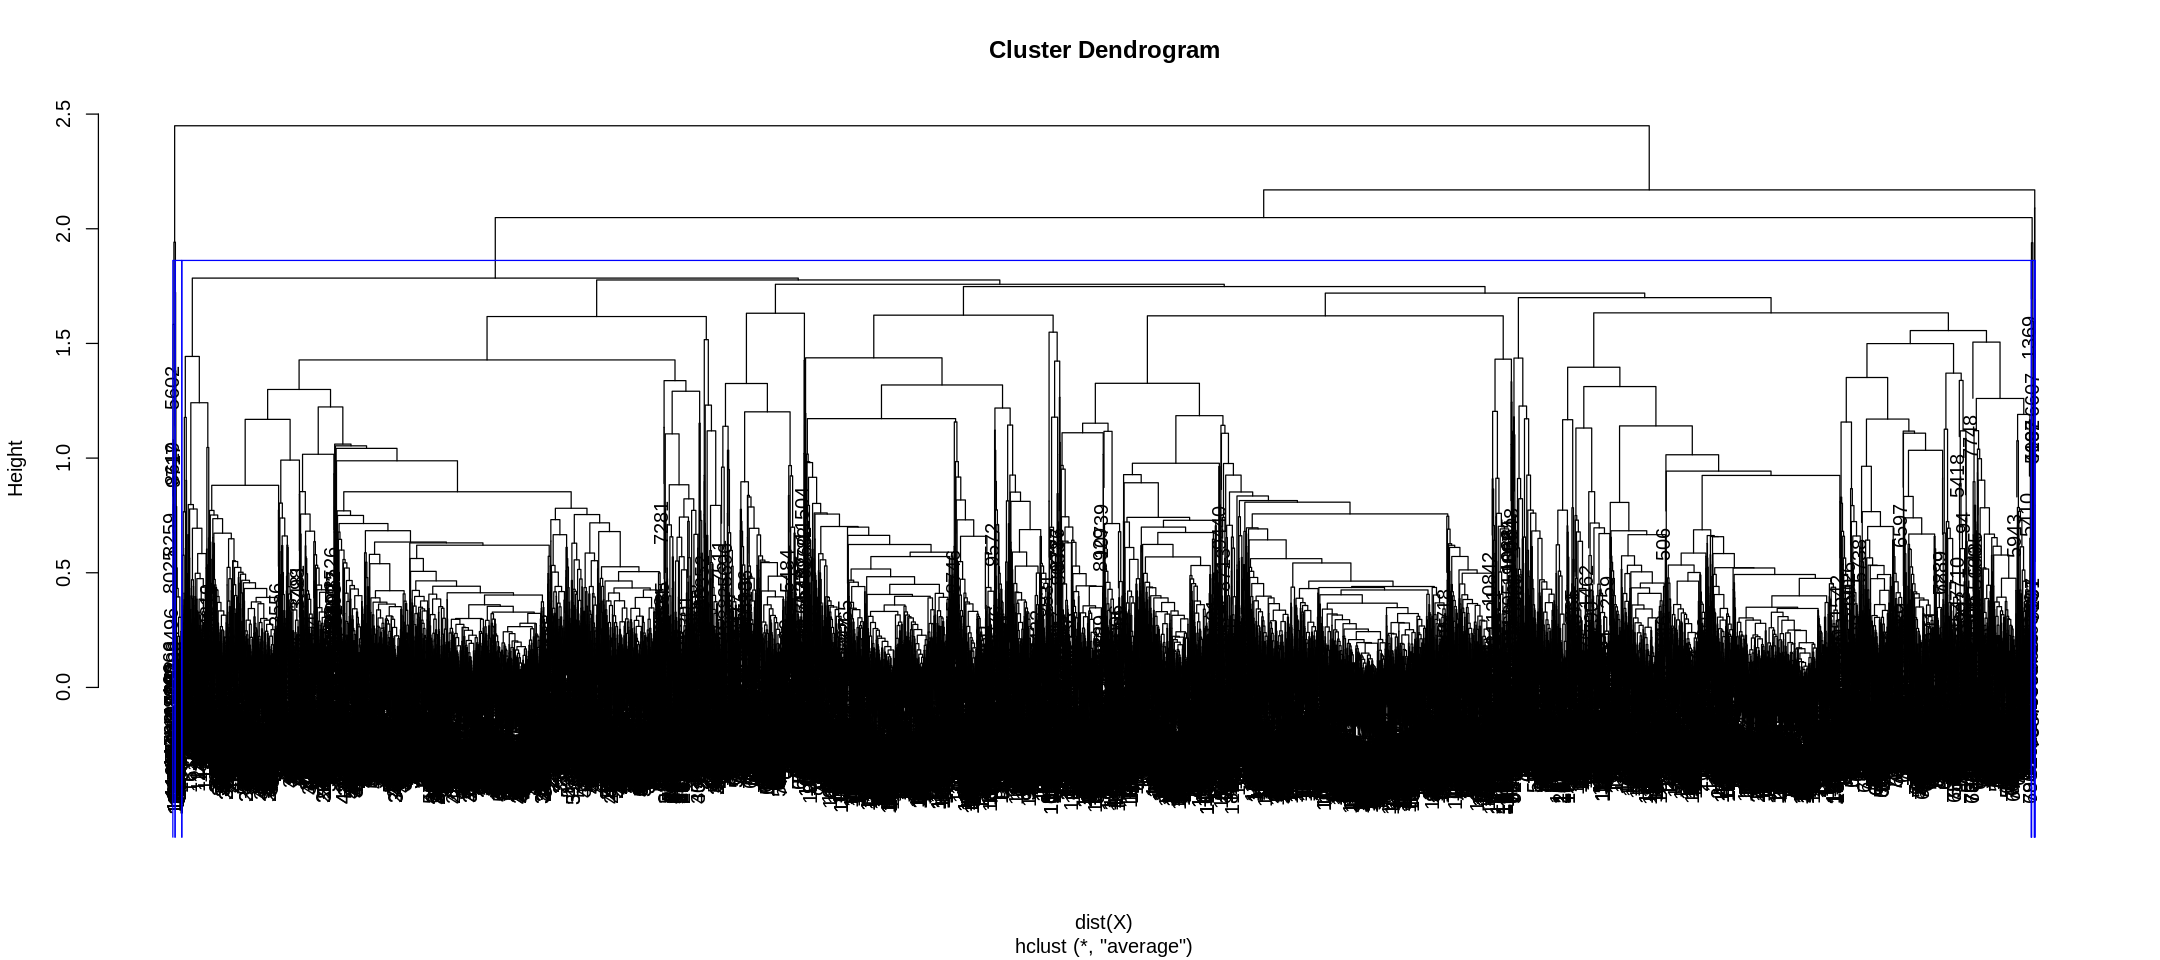

In [137]:
# define the number of clusters
plot(hclust)
rect.hclust(hclust,
  k = 7, # k is used to specify the number of clusters
  border = "blue"
)

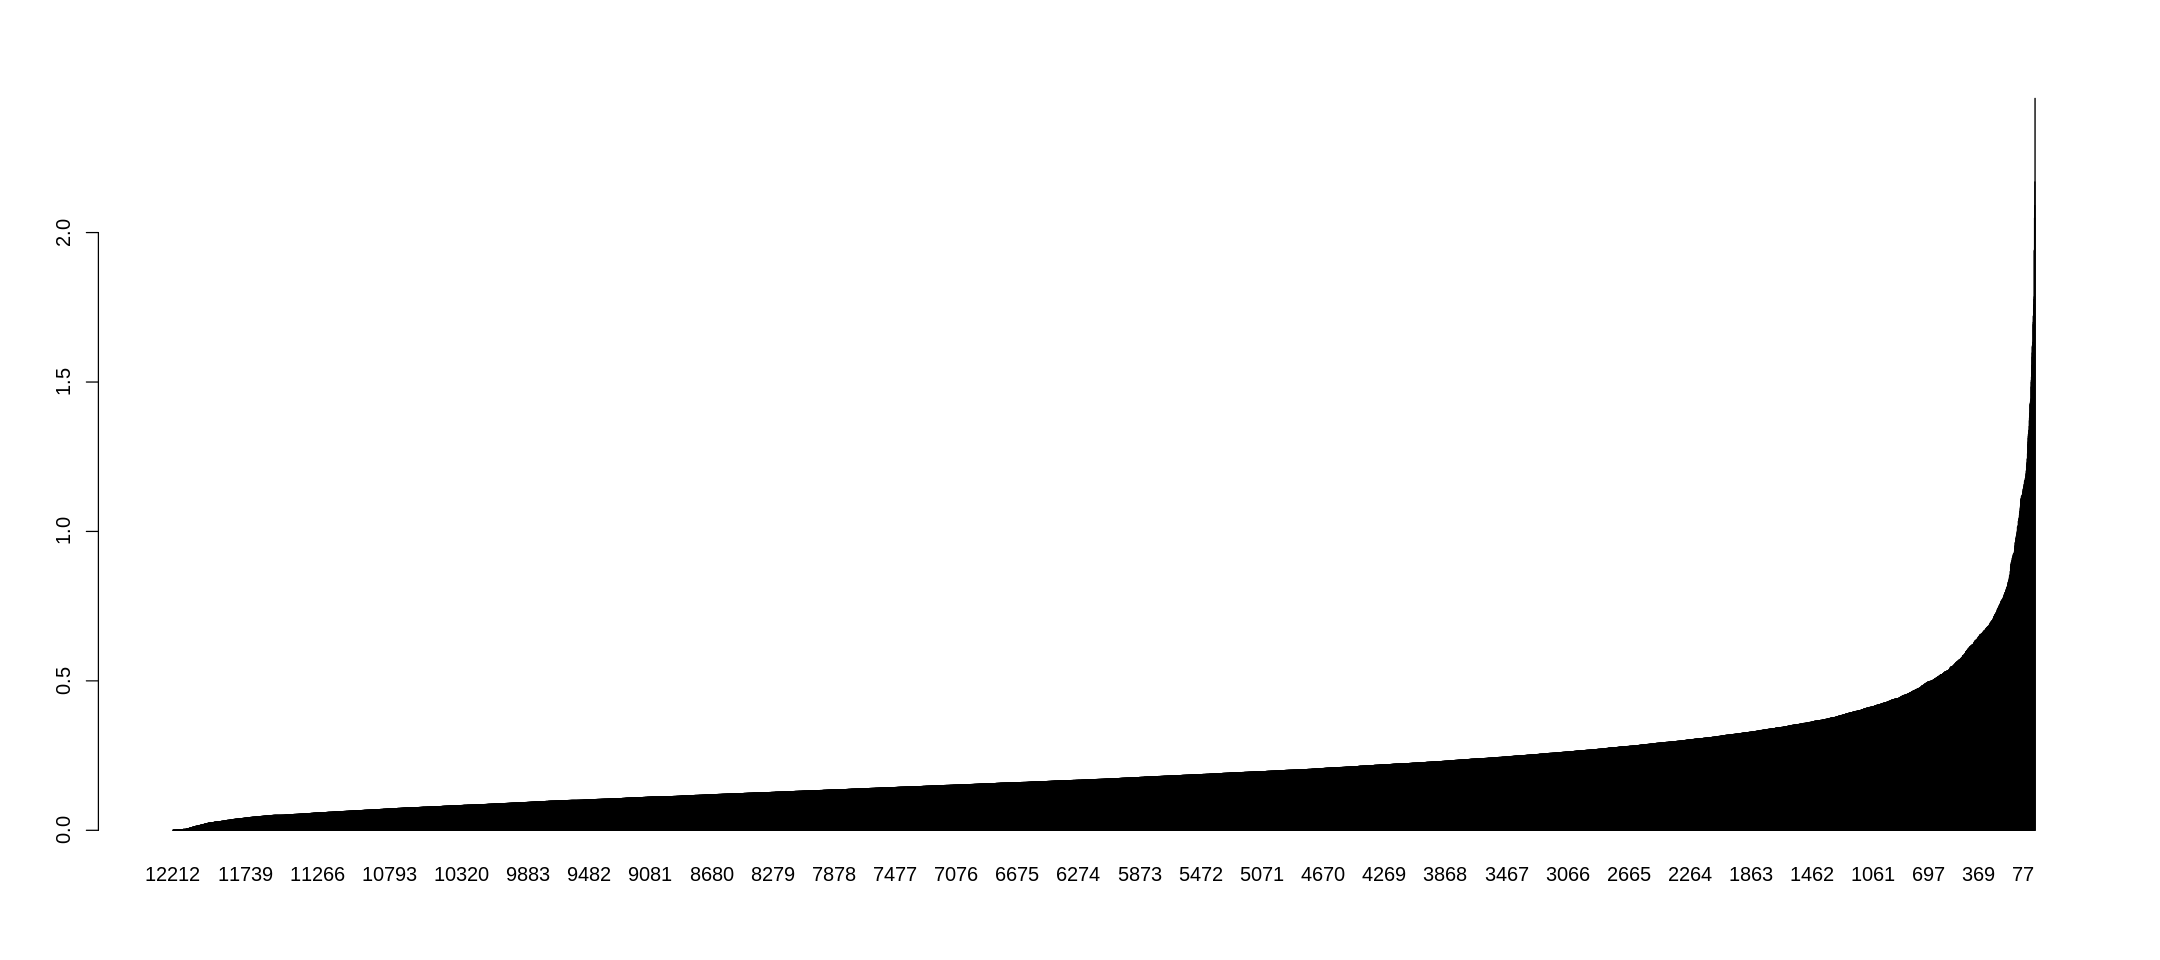

In [143]:
# check optimal number of lcusters
barplot(hclust$height,
  names.arg = (nrow(X) - 1):1 # show the number of cluster below each bars
)

The dendograms do not give us much insight, the k-means is a better alternative in examining different comsumer characteristics. While a heirarchical model is useful in examining the most important factors for interpreting consumer behavior, it fails to provide insight for large datasets

# 10. Challenging the Solution

In [144]:
install.packages("dbscan")
library(dbscan)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [145]:
it <- Dataset[,-27]

# applying our DBSCAN algorithm
# We want minimum 4 points with in a distance of eps(0.4)
# 
db<-dbscan(it, eps=0.3, MinPts = 10)

# Printing out the clustering result
# 
print(db)

Warning message in dbscan(it, eps = 0.3, MinPts = 10):
“converting argument MinPts (fpc) to minPts (dbscan)!”


DBSCAN clustering for 12213 objects.
Parameters: eps = 0.3, minPts = 10
The clustering contains 53 cluster(s) and 1462 noise points.

   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1462   97   12 1128   63  344  122   12   70 2219  172  422   67  104   20   18 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  10   10    9  240   74  116   69 1699  156  226  212   43  261  556  207   60 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
  78   18   12   41   31   41   10   12   89   33   12   15   10   13   40  239 
  48   49   50   51   52   53 
 904   37  225   53   10   10 

Available fields: cluster, eps, minPts


Warning message in hullplot(it, db$cluster):
“Not enough colors. Some colors will be reused.”


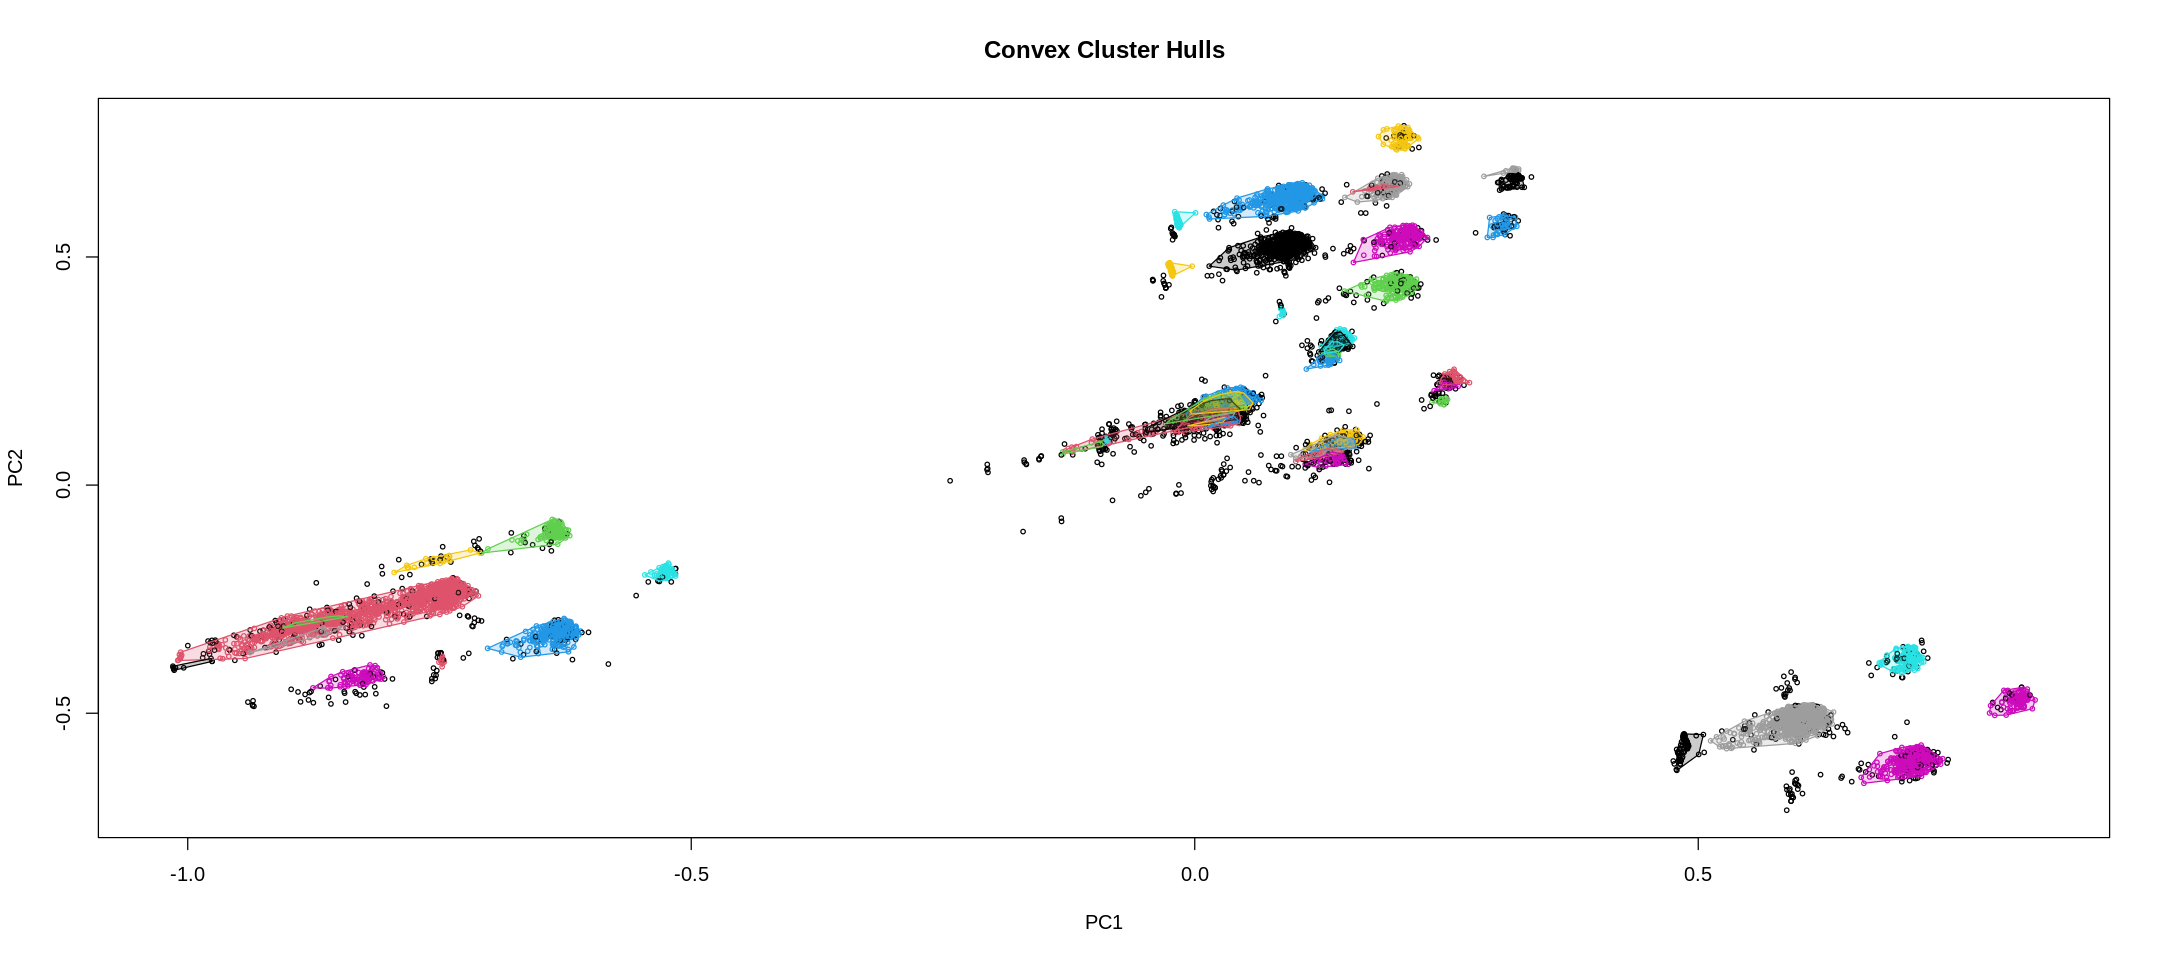

In [146]:
# We also plot our clusters as shown
# ---
# The dataset and cluster method of dbscan is used to plot the clusters.
# 
hullplot(it,db$cluster)

In [147]:
# import appropriate packages
install.packages('fpc')
library(fpc)
library(dbscan)
if(!require(devtools)) install.packages('devtools')
devtools::install_github('kassambara/factoextra')
library(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘DEoptimR’, ‘mclust’, ‘flexmix’, ‘prabclus’, ‘diptest’, ‘robustbase’, ‘kernlab’



Attaching package: ‘fpc’


The following object is masked from ‘package:dbscan’:

    dbscan


Loading required package: devtools

Loading required package: usethis




cpp11     (0.2.2  -> 0.2.4) [CRAN]
R6        (2.4.1  -> 2.5.0) [CRAN]
backports (1.1.10 -> 1.2.0) [CRAN]
generics  (0.0.2  -> 0.1.0) [CRAN]
broom     (0.7.1  -> 0.7.2) [CRAN]
diffobj   (NA     -> 0.3.2) [CRAN]
waldo     (NA     -> 0.2.2) [CRAN]
callr     (3.5.0  -> 3.5.1) [CRAN]
brio      (NA     -> 1.1.0) [CRAN]
labeling  (0.3    -> 0.4.2) [CRAN]
testthat  (2.3.2  -> 3.0.0) [CRAN]


Installing 11 packages: cpp11, R6, backports, generics, broom, diffobj, waldo, callr, brio, labeling, testthat

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpmEJHcd/remotes377b63d167/kassambara-factoextra-1689fc7/DESCRIPTION’ (471ms)
─  preparing ‘factoextra’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘factoextra_1.0.7.999.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



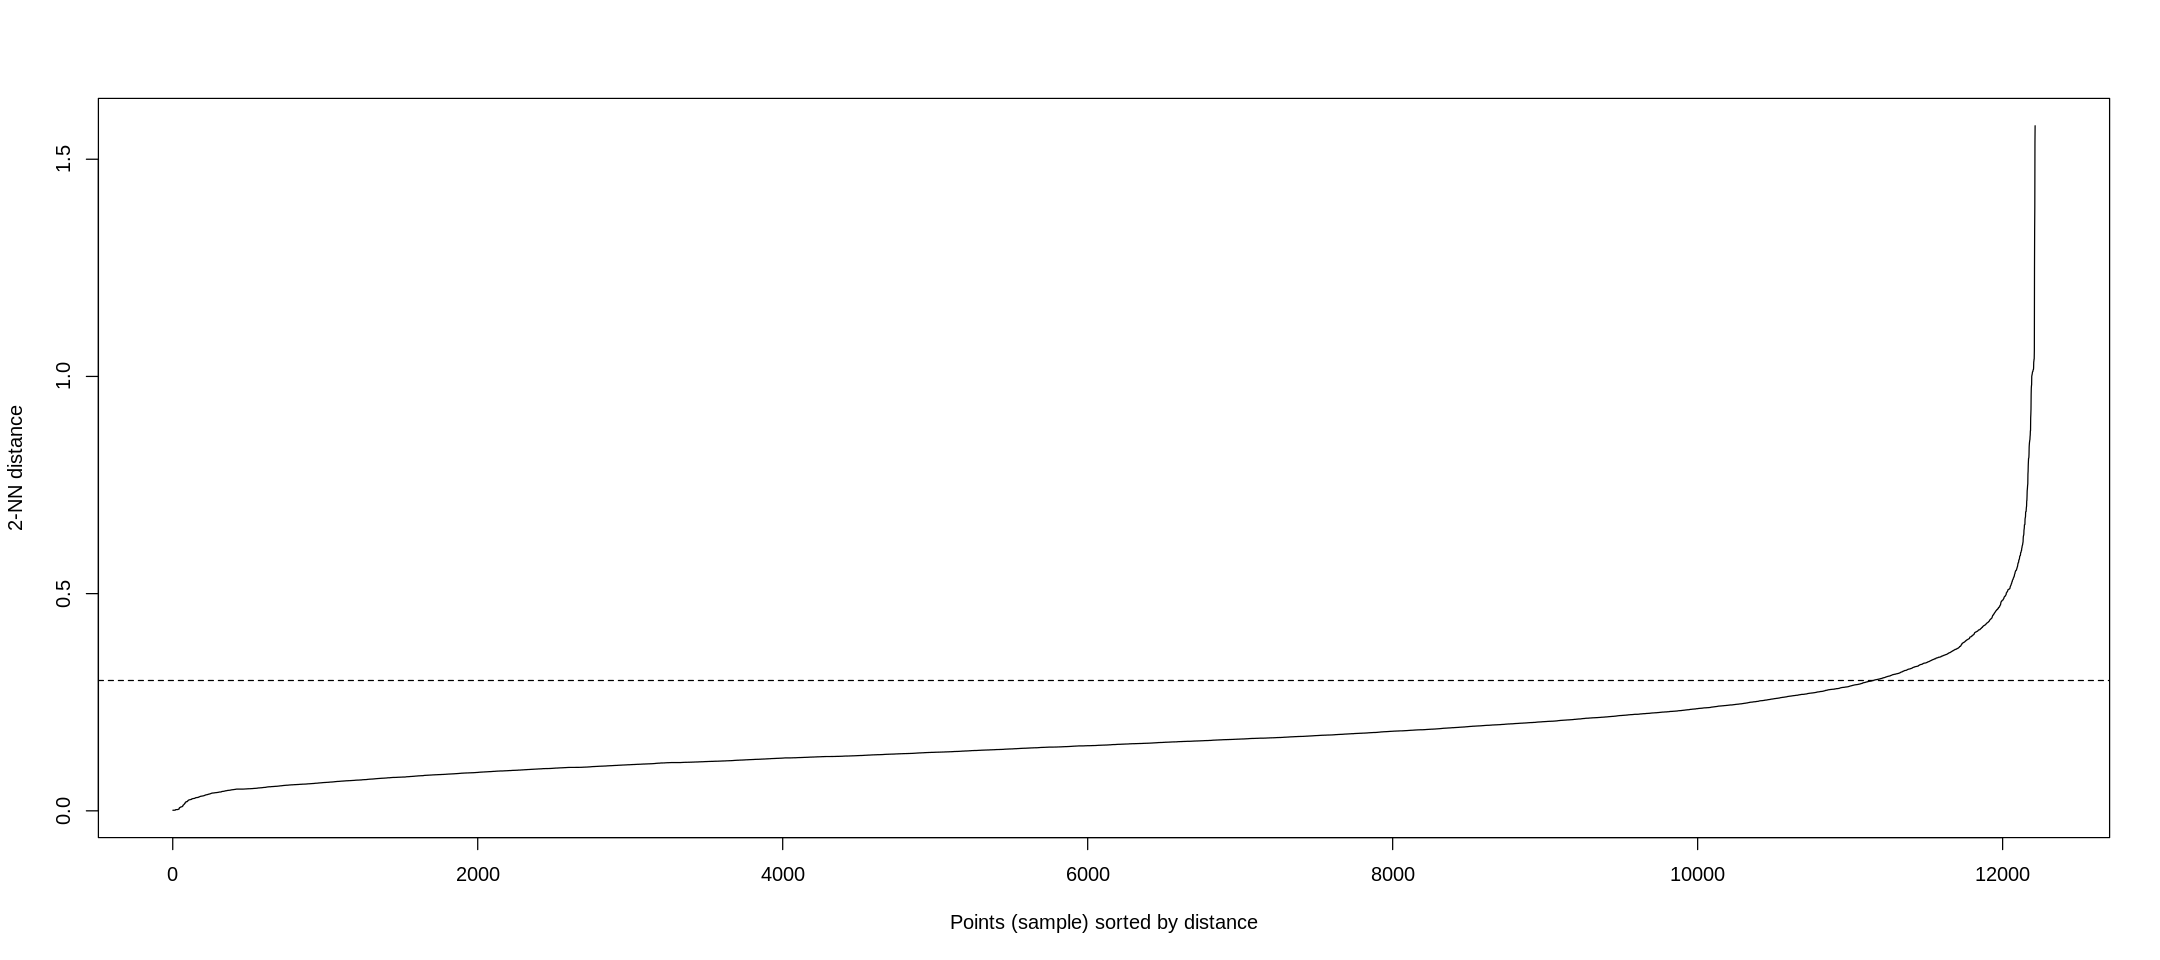

In [148]:
# obtain optimal eps value
kNNdistplot(it, k=2)
abline(h = 0.3, lty=2)

The DBSCAN custering is that it is highly effective in dealing with outliers which are categorized as noise. 

# Conclusion

The kmeans clustering is effective in providing an optimal number of subsets to study the data. However, it fails to provide greater insight. 
Dimension reduction and tuning could help in providing greater insight. 